# Hackathon 1 - Restaurant Turnover Prediction

## Problem Statement

**Goal:**
The goal of this problem is to predict the Annual Turnover of a restaurant based on the variables provided in the data set. 


**Metric to measure:**
The measure of accuracy will be RMSE (Root mean square error)


The predicted Annual Turnover for each restaurant in the Test dataset will be compared with the actual Annual Turnover to calculate the RMSE value of the entire prediction. The lower the RMSE value, the better the model will be.

**Submission File Format:**
You are to submit a  '.csv' file with exactly 500 entries plus a header row. The file should have exactly two columns

1.    Registration Number
2.    Annual Turnover

## Importing Necessary Libraries

In [84]:
# Suppressing warnings
import warnings
warnings.filterwarnings("ignore") 

In [329]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

# Libraries for numerical calculations and data manipulations
import numpy as np
import pandas as pd

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for statistical works
import scipy.stats as stats
import statsmodels.stats.api as sms

# Libraries for supervised leanring
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV

# Setting the background theme and font scale for figures
sns.set_theme(style = 'darkgrid', font_scale = 1.15)

# To restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Forcing python to show all columns
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Loading the Dataset

In [86]:
# Loading the dataset
data_orig = pd.read_csv('/content/drive/MyDrive/Python_files/Train_hackathon.csv')
# Ensuring the original data remains untouched
df = data_orig.copy()

# Peeking the first few rows
df.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14/02/09,84.300,Not Specific,95.800,1,1,1,0,1,2.000,Bar,Arabian,3,0,2,5,5,5,7,10.000,4.000,NaN,NaN,NaN,8.000,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29/09/08,85.400,Tier A Celebrity,85.000,1,1,1,1,0,2.000,Bar,Greek,3,0,6,6,6,7,8,9.000,NaN,4.000,NaN,NaN,5.000,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30/07/11,85.000,Tier A Celebrity,68.200,1,1,1,1,0,2.000,Bar,90's,3,0,2,6,5,3,7,8.000,3.000,NaN,NaN,NaN,7.000,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30/11/08,85.600,Tier A Celebrity,83.600,0,1,1,1,1,1.000,Bar,Arabian,3,1,7,6,5,6,8,9.000,6.000,NaN,NaN,NaN,7.000,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22/02/10,NaN,Tier A Celebrity,76.800,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.000,NaN,2.000,NaN,NaN,NaN,6,2,4,6


In [87]:
# Peeking the last seven rows
df.tail()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
3488,63489,40500000,"algerian,belgian",-1,Near Party Hub,20/03/09,69.100,Not Specific,62.110,1,1,0,1,1,2.000,Bar,Arabian,4,0,3,5,5,6,6,9.000,5.000,NaN,NaN,NaN,7.000,7,6,6,8
3489,63490,32500000,"tibetan,greek",Bangalore,Near Party Hub,05/02/12,91.000,Not Specific,96.300,1,1,0,1,0,2.000,Bar,Greek,3,0,1,4,5,7,8,NaN,4.000,NaN,NaN,NaN,4.000,9,4,0,5
3490,63491,42500000,"indian,irish",Chennai,Near Party Hub,21/05/09,80.830,Not Specific,86.800,1,1,1,1,0,2.000,Bar,Nature,3,1,8,5,4,6,6,8.000,NaN,NaN,NaN,3.000,6.000,8,3,3,7
3491,63492,53000000,"japanese,thai",Bangalore,Near Party Hub,22/06/08,79.400,Not Specific,86.000,1,1,1,1,1,2.000,Bar,Greek,3,1,5,5,3,5,10,7.000,3.000,2.000,NaN,NaN,7.000,6,3,3,6
3492,63493,12000000,"indian,irish",Ghaziabad,Near Party Hub,23/04/09,72.000,Not Specific,67.000,1,1,1,1,1,2.000,Bar,Greek,2,0,2,4,4,4,5,NaN,1.000,NaN,NaN,NaN,6.000,9,6,3,8


## Data Overview

*   Observations
*   Sanity checks

### Checking the Shape of the Dataset

In [88]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The dataset has 3493 rows and 34 columns.


### Checking the data types and general info of data columns


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [90]:
# Renaming Columns with long names
df.rename(columns = {'Facebook Popularity Quotient': 'Facebook Popularity', 'Instagram Popularity Quotient': 'Instagram Popularity', 
                     'Restaurant Location': 'Location',  'Liquor License Obtained': 'Liquor License', 
                     'Situated in a Multi Complex': 'Multicomplex', 'Dedicated Parking': 'Parking', 
                     'Open Sitting Available': 'Open Sitting', 'Resturant Tier': 'Tier', 'Restaurant Type': 'Type',
                     'Restaurant Theme': 'Theme', 'Restaurant Zomato Rating': 'Zomato Rating',
                     'Restaurant City Tier': 'City Tier', 'Order Wait Time': 'Wait Time', 
                     'Staff Responsivness': 'Responsiveness', 'Overall Restaurant Rating': 'Overall Rating',
                     'Endorsed By': 'Endorsement', 'Comfortablility': 'Comfortability'}, inplace = True)

df.head()

,Registration Number,Annual Turnover,Cuisine,City,Location,Opening Day of Restaurant,Facebook Popularity,Endorsement,Instagram Popularity,Fire Audit,Liquor License,Multicomplex,Parking,Open Sitting,Tier,Type,Theme,Zomato Rating,City Tier,Wait Time,Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortability,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14/02/09,84.300,Not Specific,95.800,1,1,1,0,1,2.000,Bar,Arabian,3,0,2,5,5,5,7,10.000,4.000,NaN,NaN,NaN,8.000,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29/09/08,85.400,Tier A Celebrity,85.000,1,1,1,1,0,2.000,Bar,Greek,3,0,6,6,6,7,8,9.000,NaN,4.000,NaN,NaN,5.000,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30/07/11,85.000,Tier A Celebrity,68.200,1,1,1,1,0,2.000,Bar,90's,3,0,2,6,5,3,7,8.000,3.000,NaN,NaN,NaN,7.000,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30/11/08,85.600,Tier A Celebrity,83.600,0,1,1,1,1,1.000,Bar,Arabian,3,1,7,6,5,6,8,9.000,6.000,NaN,NaN,NaN,7.000,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22/02/10,NaN,Tier A Celebrity,76.800,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.000,NaN,2.000,NaN,NaN,NaN,6,2,4,6


### Converting Some Columns to Categorical:

In [91]:
num_to_cat_cols = ['Fire Audit', 'Liquor License', 'Multicomplex', 'Parking', 'Open Sitting']

for col in num_to_cat_cols:
  df[col].replace([0, 1], ['No', 'Yes'], inplace = True)
df['Tier'].replace([1, 2], ['Low', 'High'], inplace = True)
df['City Tier'].replace([0, 1], ['Low', 'High'], inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Registration Number        3493 non-null   int64  
 1   Annual Turnover            3493 non-null   int64  
 2   Cuisine                    3493 non-null   object 
 3   City                       3493 non-null   object 
 4   Location                   3493 non-null   object 
 5   Opening Day of Restaurant  3493 non-null   object 
 6   Facebook Popularity        3394 non-null   float64
 7   Endorsement                3493 non-null   object 
 8   Instagram Popularity       3437 non-null   float64
 9   Fire Audit                 3493 non-null   object 
 10  Liquor License             3493 non-null   object 
 11  Multicomplex               3493 non-null   object 
 12  Parking                    3493 non-null   object 
 13  Open Sitting               3493 non-null   objec

### Modifying Variables

In [92]:
## Converting the unit of turnover to Million INR
df['Scaled Turnover'] = df['Annual Turnover']/10**6
# Converting opening date to datetime
df['Opening Day of Restaurant'] = pd.to_datetime(df['Opening Day of Restaurant'], format = '%d/%m/%y')

In [93]:
# Separating the two primary cuisines
for i in range(df.shape[0]):
  txt = df.loc[i, 'Cuisine']
  txt1 = txt.split(',')[0]
  txt2 = txt.split(',')[1]
  df.loc[i, 'Cuisine1'] = txt1
  df.loc[i, 'Cuisine2'] = txt2
df.head()

,Registration Number,Annual Turnover,Cuisine,City,Location,Opening Day of Restaurant,Facebook Popularity,Endorsement,Instagram Popularity,Fire Audit,Liquor License,Multicomplex,Parking,Open Sitting,Tier,Type,Theme,Zomato Rating,City Tier,Wait Time,Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortability,Privacy,Scaled Turnover,Cuisine1,Cuisine2
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,2009-02-14,84.300,Not Specific,95.800,Yes,Yes,Yes,No,Yes,High,Bar,Arabian,3,Low,2,5,5,5,7,10.000,4.000,NaN,NaN,NaN,8.000,8,6,6,6,42.000,indian,irish
1,60002,50000000,"indian,irish",Indore,Near Party Hub,2008-09-29,85.400,Tier A Celebrity,85.000,Yes,Yes,Yes,Yes,No,High,Bar,Greek,3,Low,6,6,6,7,8,9.000,NaN,4.000,NaN,NaN,5.000,7,7,3,8,50.000,indian,irish
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,2011-07-30,85.000,Tier A Celebrity,68.200,Yes,Yes,Yes,Yes,No,High,Bar,90's,3,Low,2,6,5,3,7,8.000,3.000,NaN,NaN,NaN,7.000,10,5,2,8,32.500,tibetan,italian
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,2008-11-30,85.600,Tier A Celebrity,83.600,No,Yes,Yes,Yes,Yes,Low,Bar,Arabian,3,High,7,6,5,6,8,9.000,6.000,NaN,NaN,NaN,7.000,7,4,3,5,110.000,turkish,nigerian
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,2010-02-22,NaN,Tier A Celebrity,76.800,Yes,Yes,Yes,Yes,Yes,NaN,Bar,Greek,3,Low,10,5,6,4,8,6.000,NaN,2.000,NaN,NaN,NaN,6,2,4,6,20.000,irish,belgian


### Statistical Summary of the Dataset

In [94]:
# Numerical columns
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
Registration Number,3493.000,61747.000,1008.487,60001.000,60874.000,61747.000,62620.000,63493.000
Annual Turnover,3493.000,30725708.560,21651246.901,3500000.000,18000000.000,30000000.000,37000000.000,400000000.000
Facebook Popularity,3394.000,77.939,9.829,43.000,72.000,79.000,85.745,97.760
Instagram Popularity,3437.000,74.405,10.940,40.000,66.000,74.050,82.400,98.700
Zomato Rating,3493.000,2.697,0.787,0.000,2.000,3.000,3.000,5.000
Wait Time,3493.000,5.510,2.854,1.000,3.000,5.000,8.000,10.000
Responsiveness,3493.000,4.539,1.094,1.000,4.000,5.000,5.000,8.000
Value for Money,3493.000,4.526,0.914,1.000,4.000,5.000,5.000,7.000
Hygiene Rating,3493.000,4.662,1.260,1.000,4.000,5.000,6.000,9.000
Food Rating,3493.000,7.523,1.723,5.000,6.000,7.000,9.000,10.000


#### Observations:
*   The mean and median of turnover are ~ 30M INR but some successful restaurants make up to 400M INR annually.
*   The average social media ratings are about 75%.

In [95]:
# Categorical columns
cat_sum = df.describe(include = ['object', 'category']).T
cat_sum['frac'] = cat_sum['freq']/cat_sum['count']
cat_sum

,count,unique,top,freq,frac
Cuisine,3493,20,"tibetan,greek",686,0.196
City,3493,297,Bangalore,553,0.158
Location,3493,2,Near Party Hub,2658,0.761
Endorsement,3493,3,Not Specific,1961,0.561
Fire Audit,3493,2,Yes,2755,0.789
Liquor License,3493,2,Yes,3452,0.988
Multicomplex,3493,2,Yes,2823,0.808
Parking,3493,2,Yes,2801,0.802
Open Sitting,3493,2,Yes,2795,0.800
Tier,3444,2,High,3191,0.927


#### Observations:

*   Most popular primary and secondary cuisines are Tibetan and Greek, respectively.
*   More than 15% of restaurants are located in Bangalore, making it most frequent city for the restaurants in the list.
*   Majority of restaurants have parkings and open sittings and are located in multicomplex.

### Checking on Duplicate and Missing Values:

In [96]:
print('Dataset has {} duplicated entries.'.format(df.duplicated().sum()))
print('\nMissing values across different columns:')
df.isnull().sum()

Dataset has 0 duplicated entries.

Missing values across different columns:


Registration Number             0
Annual Turnover                 0
Cuisine                         0
City                            0
Location                        0
Opening Day of Restaurant       0
Facebook Popularity            99
Endorsement                     0
Instagram Popularity           56
Fire Audit                      0
Liquor License                  0
Multicomplex                    0
Parking                         0
Open Sitting                    0
Tier                           49
Type                            0
Theme                           0
Zomato Rating                   0
City Tier                       0
Wait Time                       0
Responsiveness                  0
Value for Money                 0
Hygiene Rating                  0
Food Rating                     0
Overall Rating                212
Live Music Rating             765
Comedy Gigs Rating           2483
Value Deals Rating           2707
Live Sports Rating           3288
Ambience      

### Converting Special Features to Tiers

In [97]:
# Maximum rating
live_music_max = 10
comedy_gig_max = 6
value_deals_max = 7
live_sports_max = 6

features_to_change = ['Live Music Rating', 'Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating']
max_list = [live_music_max, comedy_gig_max, value_deals_max, live_sports_max]

# Changing numerical rating into tiers
for i, col in enumerate(features_to_change):
    df[col] = pd.cut(df[col], bins = [0, max_list[i]/3, 2*max_list[i]/3, max_list[i]], 
                     labels = ['Bad', 'Moderate', 'Good'])
    df[col] = df[col].astype(object)
    df.loc[df[col].isnull(), col] = 'None'


# Renaming
df.rename(columns = {'Live Music Rating': 'Live Music', 'Comedy Gigs Rating': 'Comedy Gigs',
                    'Value Deals Rating': 'Value Deals', 'Live Sports Rating': 'Live Sports'}, inplace = True)
df.head(10)

,Registration Number,Annual Turnover,Cuisine,City,Location,Opening Day of Restaurant,Facebook Popularity,Endorsement,Instagram Popularity,Fire Audit,Liquor License,Multicomplex,Parking,Open Sitting,Tier,Type,Theme,Zomato Rating,City Tier,Wait Time,Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Rating,Live Music,Comedy Gigs,Value Deals,Live Sports,Ambience,Lively,Service,Comfortability,Privacy,Scaled Turnover,Cuisine1,Cuisine2
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,2009-02-14,84.300,Not Specific,95.800,Yes,Yes,Yes,No,Yes,High,Bar,Arabian,3,Low,2,5,5,5,7,10.000,Moderate,None,None,None,8.000,8,6,6,6,42.000,indian,irish
1,60002,50000000,"indian,irish",Indore,Near Party Hub,2008-09-29,85.400,Tier A Celebrity,85.000,Yes,Yes,Yes,Yes,No,High,Bar,Greek,3,Low,6,6,6,7,8,9.000,None,Moderate,None,None,5.000,7,7,3,8,50.000,indian,irish
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,2011-07-30,85.000,Tier A Celebrity,68.200,Yes,Yes,Yes,Yes,No,High,Bar,90's,3,Low,2,6,5,3,7,8.000,Bad,None,None,None,7.000,10,5,2,8,32.500,tibetan,italian
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,2008-11-30,85.600,Tier A Celebrity,83.600,No,Yes,Yes,Yes,Yes,Low,Bar,Arabian,3,High,7,6,5,6,8,9.000,Moderate,None,None,None,7.000,7,4,3,5,110.000,turkish,nigerian
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,2010-02-22,NaN,Tier A Celebrity,76.800,Yes,Yes,Yes,Yes,Yes,NaN,Bar,Greek,3,Low,10,5,6,4,8,6.000,None,Bad,None,None,NaN,6,2,4,6,20.000,irish,belgian
5,60006,30000000,"tibetan,greek",Hyderabad,Near Party Hub,2011-06-28,89.920,Not Specific,87.000,Yes,Yes,Yes,Yes,Yes,High,Bar,Greek,3,Low,10,5,5,6,8,NaN,Moderate,None,Moderate,None,6.000,5,0,2,5,30.000,tibetan,greek
6,60007,30000000,"indian,irish",Banglore,Near Party Hub,2012-01-28,86.080,Not Specific,67.500,Yes,Yes,No,Yes,Yes,High,Bar,Arabian,3,High,2,5,4,3,10,7.000,Moderate,None,Moderate,None,10.000,6,2,0,4,30.000,indian,irish
7,60008,40000000,"indian,irish",Bangalore,Near Party Hub,2011-05-23,92.000,Tier A Celebrity,91.000,Yes,Yes,Yes,Yes,Yes,Low,Bar,Nature,0,Low,8,5,5,5,6,9.000,None,None,None,Moderate,6.000,9,5,4,9,40.000,indian,irish
8,60009,60000000,"chinese,salvadorian",Noida,Near Party Hub,2010-09-12,90.000,Tier A Celebrity,NaN,No,Yes,No,Yes,No,NaN,Bar,Greek,4,High,4,6,6,5,9,10.000,Good,Moderate,None,None,6.000,8,3,2,6,60.000,chinese,salvadorian
9,60010,23000000,"algerian,belgian",Kolkata,Near Party Hub,2012-06-08,NaN,Tier A Celebrity,NaN,Yes,Yes,Yes,Yes,Yes,High,Bar,Greek,3,High,9,6,5,5,5,8.000,Bad,Moderate,None,None,4.000,8,3,5,7,23.000,algerian,belgian


In [98]:
df.isnull().sum()

Registration Number            0
Annual Turnover                0
Cuisine                        0
City                           0
Location                       0
Opening Day of Restaurant      0
Facebook Popularity           99
Endorsement                    0
Instagram Popularity          56
Fire Audit                     0
Liquor License                 0
Multicomplex                   0
Parking                        0
Open Sitting                   0
Tier                          49
Type                           0
Theme                          0
Zomato Rating                  0
City Tier                      0
Wait Time                      0
Responsiveness                 0
Value for Money                0
Hygiene Rating                 0
Food Rating                    0
Overall Rating               212
Live Music                     0
Comedy Gigs                    0
Value Deals                    0
Live Sports                    0
Ambience                      25
Lively    

## Exploratory Data Analysis (EDA)




In [99]:
# Function for annotating the bars in a countplot
def countplot_labeling(cntplt, data, perc = True):
  ''' This function gets a countplot and the dataset that has generated
  the plot to produce the values corresponding to each bar (category).
  If perc = True, percentages will be shown.'''

  total = data.shape[0]  # total number of values in the dataset
  for p in cntplt.patches:
        if perc == True:
          # percentage of each category
          label = "{:.1f}%".format(100*p.get_height()/total)
        else:
          label = round(p.get_height(),1)  # count of each category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        # annotate the bar
        cntplt.annotate(label, (x, y), ha = "center", va = "center", size=12, xytext=(0, 5), textcoords = "offset points")  

### Univariate Analysis

**`City`**

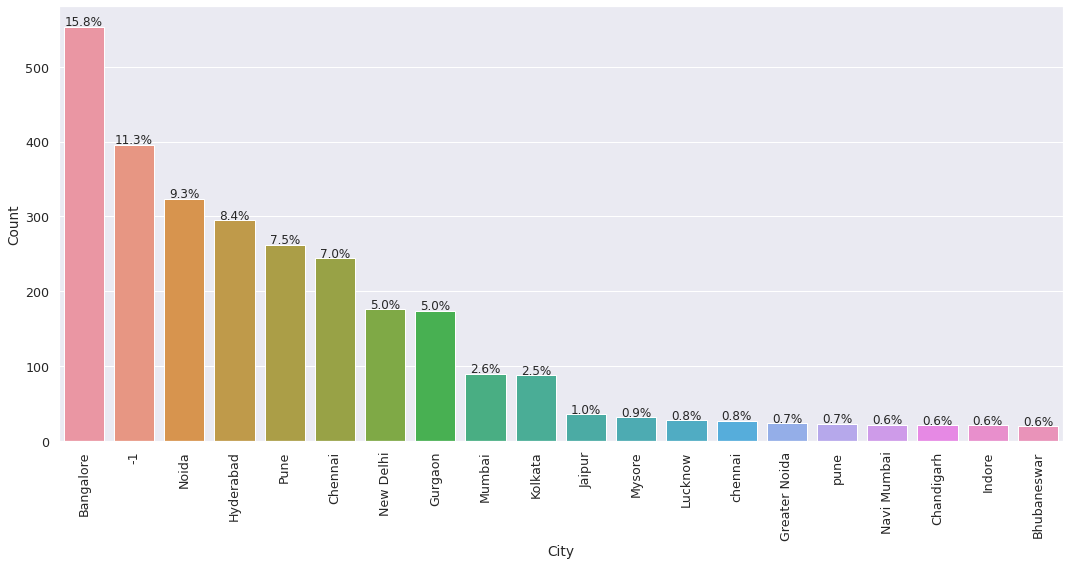

In [100]:
# Plotting the frequency of restaurants' cities

plt.figure(figsize = (18, 8));
cntplt = sns.countplot(data = df, x = 'City', order = df['City'].value_counts(ascending = False).index.tolist()[0:20]);
countplot_labeling(cntplt, df)
plt.xticks(rotation = 90);
plt.xlabel('City');
plt.ylabel('Count');

In [101]:
df.drop(columns = 'City', axis = 1, inplace = True)

#### Notes:
There are way too many cities and more than 10% of them is unknown (-1). That's why we chose to drop it.

**`Cuisine`**

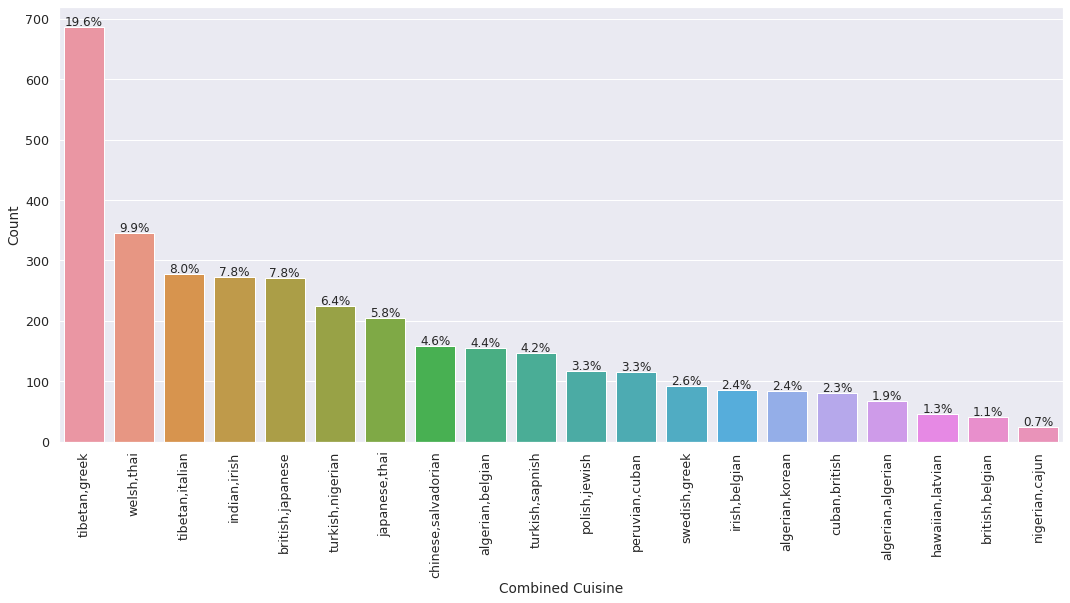

In [102]:
# Plotting the frequency of Cuisine of restaurants 

plt.figure(figsize = (18, 8));
cntplt = sns.countplot(data = df, x = 'Cuisine', order = df['Cuisine'].value_counts(ascending = False).index.tolist());
countplot_labeling(cntplt, df)
plt.xlabel('Combined Cuisine');
plt.ylabel('Count');
plt.xticks(rotation = 90);

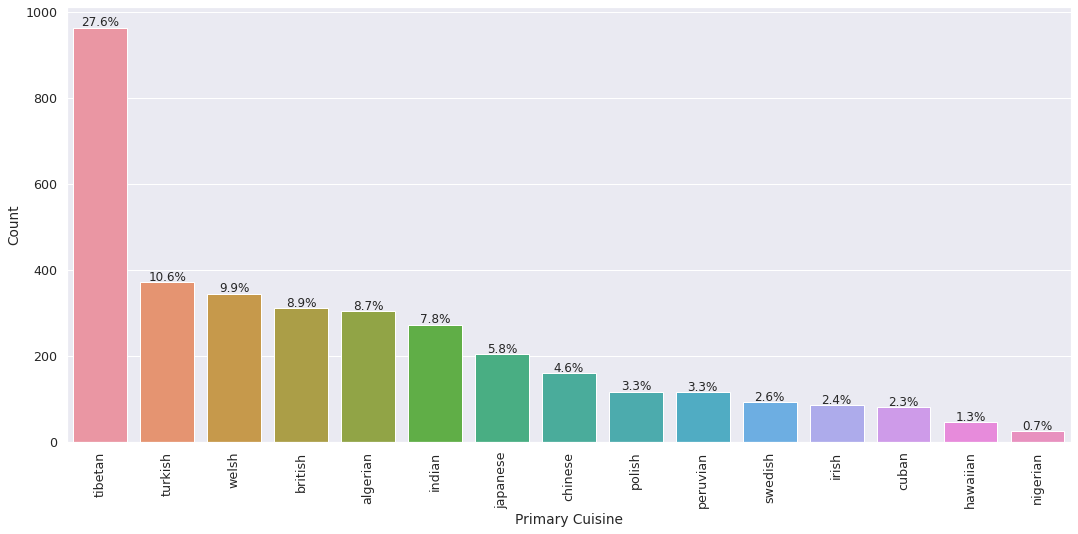

In [103]:
# Plotting the frequency of Primary Cuisine of restaurants 

plt.figure(figsize = (18, 8));
cntplt = sns.countplot(data = df, x = 'Cuisine1', order = df['Cuisine1'].value_counts(ascending = False).index.tolist());
countplot_labeling(cntplt, df)
plt.xlabel('Primary Cuisine');
plt.ylabel('Count');
plt.xticks(rotation = 90);

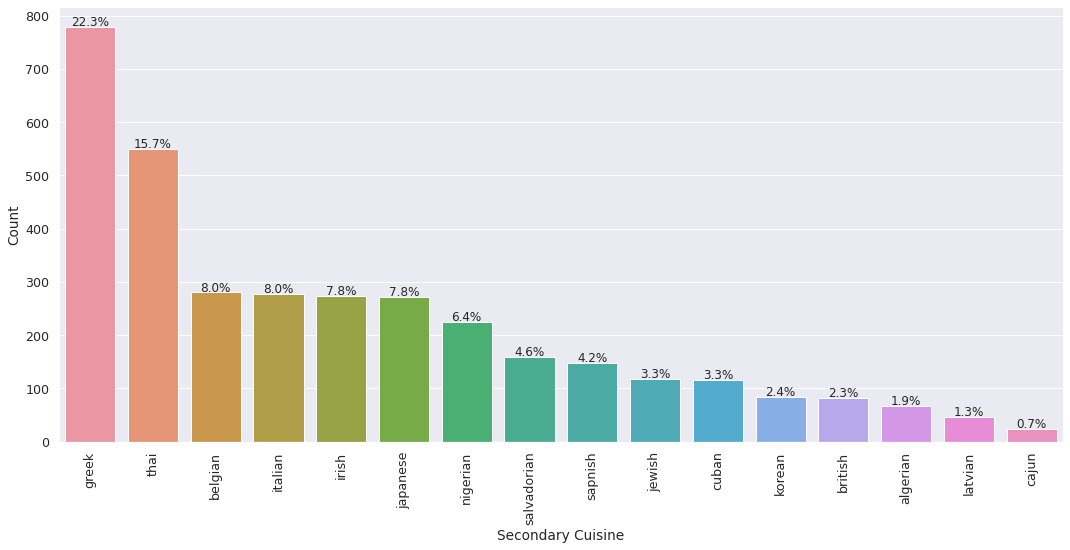

In [104]:
# Plotting the frequency of Secondary Cuisine of restaurants 

plt.figure(figsize = (18, 8));
cntplt = sns.countplot(data = df, x = 'Cuisine2', order = df['Cuisine2'].value_counts(ascending = False).index.tolist());
countplot_labeling(cntplt, df)
plt.xlabel('Secondary Cuisine');
plt.ylabel('Count');
plt.xticks(rotation = 90);

In [ ]:
df.drop(columns = 'Cuisine', axis = 1, inplace = True)

#### Observations: 

*   Tibetan, Turkish and Welsh are the top three popular primary cuisines.
*   Greek, Thai and Belgian are the top three popular secondary cuisines.
*   We choose to drop the cuisine column and, instead, work with cusinse1 and cuisine2 as two separate variables. 

**`Restaurant Location`**

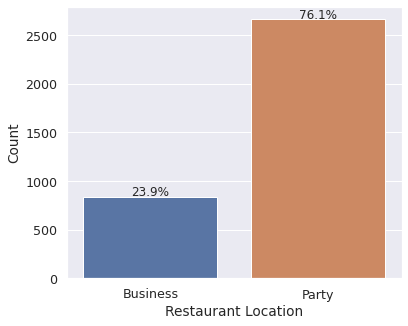

In [106]:
# Plotting the frequency of restaurant locations

df.loc[df['Location'] == 'Near Business Hub', 'Location'] ='Business'
df.loc[df['Location'] == 'Near Party Hub', 'Location'] = 'Party'

plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'Location');
countplot_labeling(cntplt, df)
plt.xlabel('Restaurant Location');
plt.ylabel('Count');

**`Opening Year`**

In [107]:
# Generating opening year feature for the restaurants
df['Opening Year'] = df['Opening Day of Restaurant'].dt.year

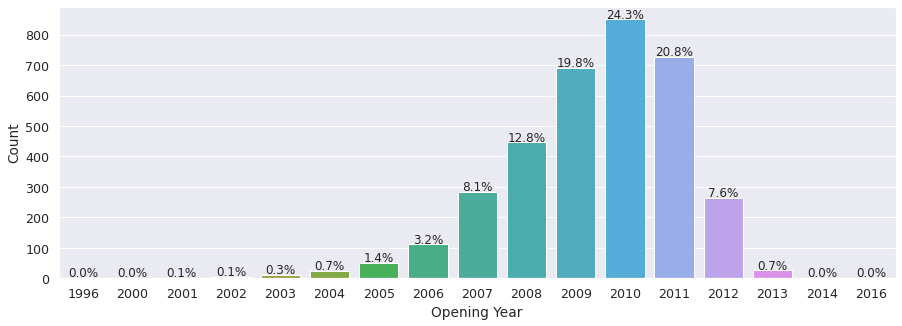

In [108]:
# Plotting the frequency of opening year 

plt.figure(figsize = (15, 5));
cntplt = sns.countplot(data = df, x = 'Opening Year');
countplot_labeling(cntplt, df)
plt.xlabel('Opening Year');
plt.ylabel('Count');

#### Observations:

Majority of restaurants have been opened between 2009 and 2011.

In [109]:
# Creating days, months and years since opening features  

from datetime import date
from time import mktime

second_to_day_convertor = 86400.0

df['Years Since Opening'] = date.today().year - df['Opening Year']

for i in range(df.shape[0]): 
  df.loc[i, 'Days Since Opening'] = (mktime(date.today().timetuple()) - 
  df.loc[i, 'Opening Day of Restaurant'].timestamp())/second_to_day_convertor

df['Months Since Opening'] = np.floor(df['Days Since Opening']/30)

df.head()

,Registration Number,Annual Turnover,Cuisine,Location,Opening Day of Restaurant,Facebook Popularity,Endorsement,Instagram Popularity,Fire Audit,Liquor License,Multicomplex,Parking,Open Sitting,Tier,Type,Theme,Zomato Rating,City Tier,Wait Time,Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Rating,Live Music,Comedy Gigs,Value Deals,Live Sports,Ambience,Lively,Service,Comfortability,Privacy,Scaled Turnover,Cuisine1,Cuisine2,Opening Year,Years Since Opening,Days Since Opening,Months Since Opening
0,60001,42000000,"indian,irish",Business,2009-02-14,84.300,Not Specific,95.800,Yes,Yes,Yes,No,Yes,High,Bar,Arabian,3,Low,2,5,5,5,7,10.000,Moderate,None,None,None,8.000,8,6,6,6,42.000,indian,irish,2009,13,5011.000,167.000
1,60002,50000000,"indian,irish",Party,2008-09-29,85.400,Tier A Celebrity,85.000,Yes,Yes,Yes,Yes,No,High,Bar,Greek,3,Low,6,6,6,7,8,9.000,None,Moderate,None,None,5.000,7,7,3,8,50.000,indian,irish,2008,14,5149.000,171.000
2,60003,32500000,"tibetan,italian",Business,2011-07-30,85.000,Tier A Celebrity,68.200,Yes,Yes,Yes,Yes,No,High,Bar,90's,3,Low,2,6,5,3,7,8.000,Bad,None,None,None,7.000,10,5,2,8,32.500,tibetan,italian,2011,11,4115.000,137.000
3,60004,110000000,"turkish,nigerian",Party,2008-11-30,85.600,Tier A Celebrity,83.600,No,Yes,Yes,Yes,Yes,Low,Bar,Arabian,3,High,7,6,5,6,8,9.000,Moderate,None,None,None,7.000,7,4,3,5,110.000,turkish,nigerian,2008,14,5087.000,169.000
4,60005,20000000,"irish,belgian",Party,2010-02-22,NaN,Tier A Celebrity,76.800,Yes,Yes,Yes,Yes,Yes,NaN,Bar,Greek,3,Low,10,5,6,4,8,6.000,None,Bad,None,None,NaN,6,2,4,6,20.000,irish,belgian,2010,12,4638.000,154.000


**`Endorsement`**

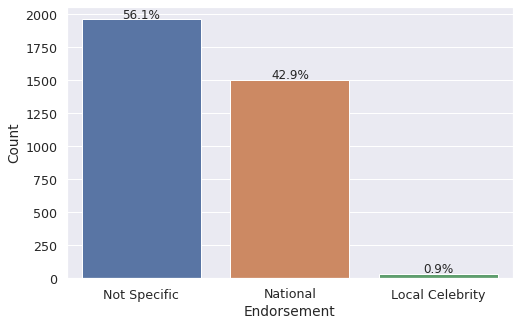

In [110]:
# Plotting the frequency of different types of endorsement 

df.loc[df['Endorsement'] == 'Tier A Celebrity', 'Endorsement'] = 'National'

plt.figure(figsize = (8, 5));
cntplt = sns.countplot(data = df, x = 'Endorsement');
countplot_labeling(cntplt, df)
plt.xlabel('Endorsement');
plt.ylabel('Count');

#### Observations:

Most restaurants have no endorsement.

**`Fire Audit`**

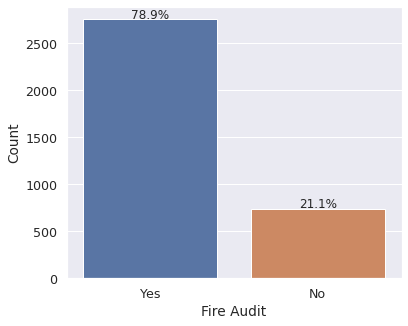

In [112]:
# Plotting the frequency of reception of fire audit

plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'Fire Audit');
countplot_labeling(cntplt, df)
plt.xlabel('Fire Audit');
plt.ylabel('Count');

#### Observations:

Close to 80% of restaurants have passed a fire audit.

**`Liquor License`**

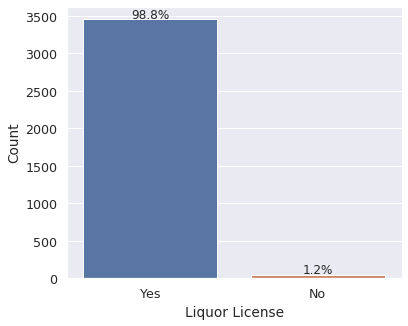

In [113]:
# Plotting the frequency of reception of liquor license

plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'Liquor License');
countplot_labeling(cntplt, df)
plt.xlabel('Liquor License');
plt.ylabel('Count');

#### Observations:

~ 99% of restaurants have a liquor license. 

**`Being Situated in a Multicomplex`**

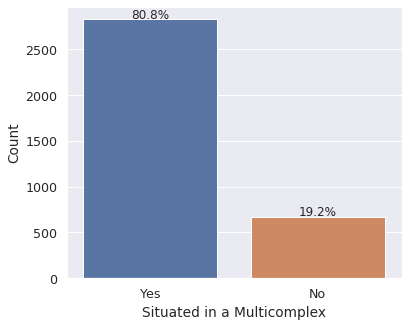

In [114]:
# Plotting the frequency of being located in a multicomplex or not

plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'Multicomplex');
countplot_labeling(cntplt, df)
plt.xlabel('Situated in a Multicomplex');
plt.ylabel('Count');

#### Observations: 

More than 80% of restaurants are located in a multicomplex.

**`Parking availability`**

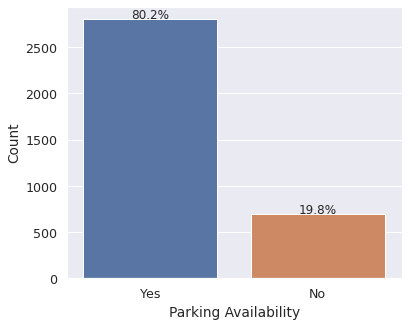

In [116]:
# Plotting the frequency of parking availability

plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'Parking', order = ['Yes', 'No']);
countplot_labeling(cntplt, df)
plt.xlabel('Parking Availability');
plt.ylabel('Count');

**`Open Sitting Availability`**

#### Observations:

More than 80% of restaurants have parking availability.

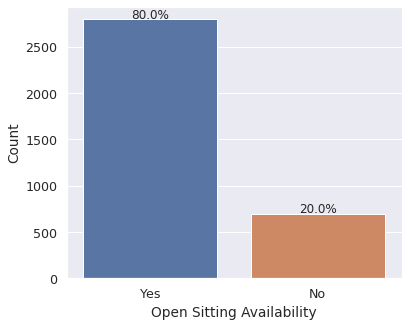

In [117]:
# Plotting the frequency of open sitting availability

plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'Open Sitting');
countplot_labeling(cntplt, df)
plt.xlabel('Open Sitting Availability');
plt.ylabel('Count');

#### Observations:

More than 80% of restaurants have open sittings.

**`Restaurant Tier`**

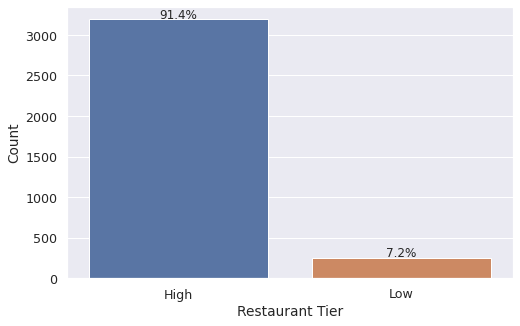

In [118]:
# Plotting the frequency of restaurant tier

plt.figure(figsize = (8, 5));
cntplt = sns.countplot(data = df, x = 'Tier');
countplot_labeling(cntplt, df)
plt.xlabel('Restaurant Tier');
plt.ylabel('Count');

#### Observations:

More than 90% of restaurants are high-tier.

**`Restaurant Type`**

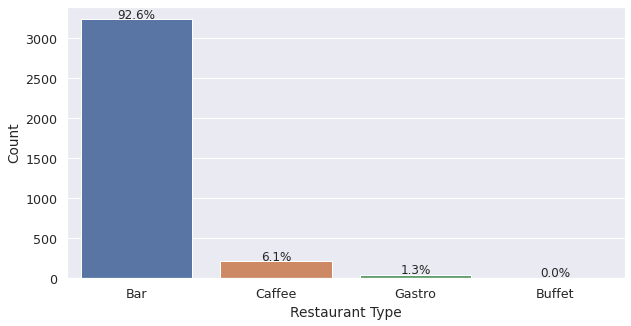

In [119]:
# Plotting the frequency of restaurant type

df.loc[df['Type'] == 'Buffet/Family Restaurant', 'Type'] = 'Buffet'
df.loc[df['Type'] == 'Gastro Bar', 'Type'] = 'Gastro'

plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'Type');
countplot_labeling(cntplt, df)
plt.xlabel('Restaurant Type');
plt.ylabel('Count');

#### Observations:

More restaurants are bar-type and almost none is buffet.

**`Restaurant Theme`**

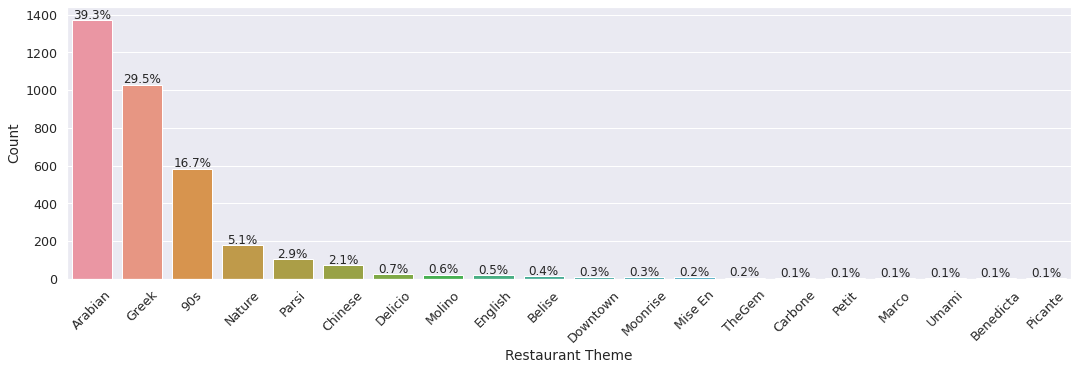

In [120]:
# Plotting the frequency of restaurant theme

df.loc[df['Theme'] == '90\'s', 'Theme'] = '90s'

plt.figure(figsize = (18, 5));
cntplt = sns.countplot(data = df, x = 'Theme', order = df['Theme'].value_counts(ascending = False).index.tolist()[0:20]);
countplot_labeling(cntplt, df)
plt.xlabel('Restaurant Theme');
plt.ylabel('Count');
plt.xticks(rotation = 45);

#### Observations:

Arabian, Greek and 90s are the top three popular themes of the restaurants.

**`Zomato Rating`**

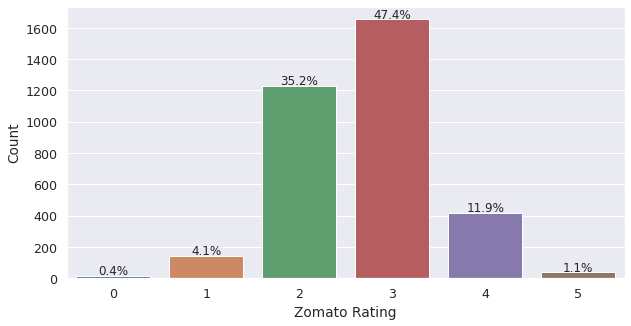

In [121]:
# Plotting the frequency of Zomato ratings

plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'Zomato Rating');
countplot_labeling(cntplt, df)
plt.xlabel('Zomato Rating');
plt.ylabel('Count');

#### Observations:

The most popular rating is 3 (out of 5).

**`Restaurant City Tier`**

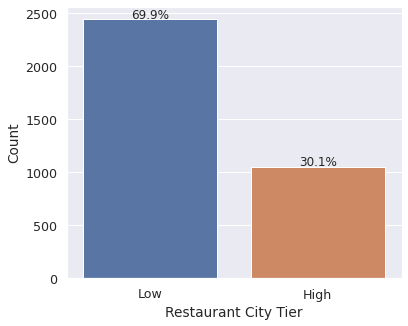

In [122]:
# Plotting the frequency of restaurant city tier

plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'City Tier');
countplot_labeling(cntplt, df)
plt.xlabel('Restaurant City Tier');
plt.ylabel('Count');

#### Observations:

About 70% of restaurants are located in low-tier cities. 

**`Staff Responsiveness`**

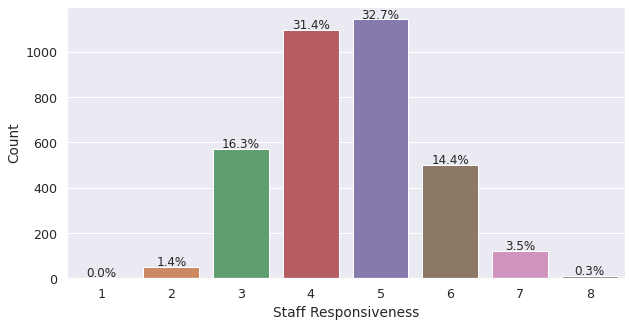

In [123]:
# Plotting the frequency of staff responsiveness

plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'Responsiveness');
countplot_labeling(cntplt, df)
plt.xlabel('Staff Responsiveness');
plt.ylabel('Count');

#### Observations:

Majority of restaurants have staff responsiveness of 4 or 5 (out of 8), which seems fairly low.

**`Value for Money`**

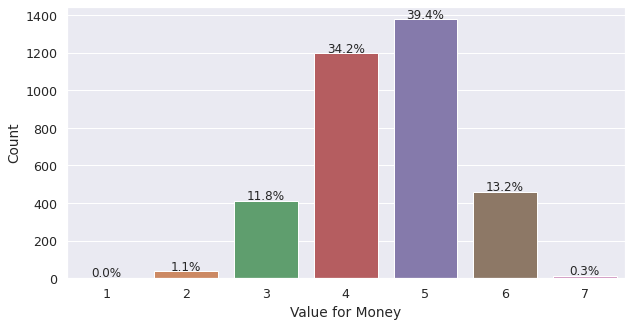

In [124]:
# Plotting the frequency of value for money

plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'Value for Money');
countplot_labeling(cntplt, df)
plt.xlabel('Value for Money');
plt.ylabel('Count');

#### Observations:

Majority of restaurants have value for money of 4 or 5 (out of 7).

**`Hygiene Rating`**

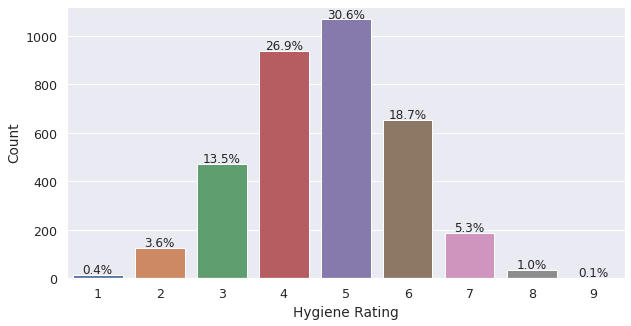

In [125]:
# Plotting the frequency of hygiene rating

plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'Hygiene Rating');
countplot_labeling(cntplt, df)
plt.xlabel('Hygiene Rating');
plt.ylabel('Count');

#### Observations:

Majority of restaurants have low or moderate hygiene ratings.

**`Food Rating`**

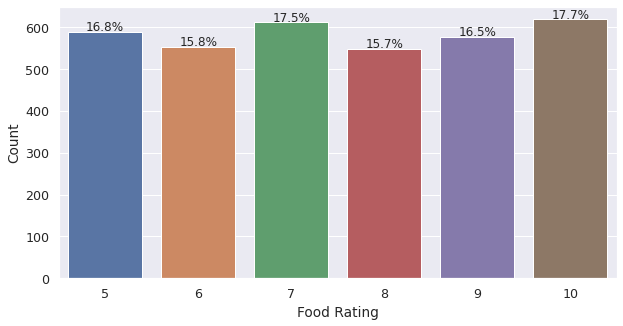

In [126]:
# Plotting the frequency of food rating

plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'Food Rating');
countplot_labeling(cntplt, df)
plt.xlabel('Food Rating');
plt.ylabel('Count');

#### Observations:

Food ratings are nearly uniformly distributed from 5 to 10.

**`Overall Restaurant Rating`**

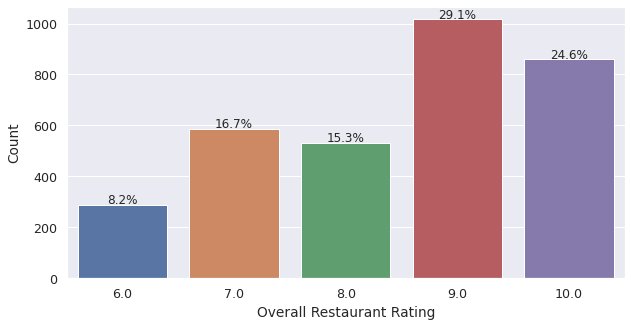

In [127]:
# Plotting the frequency of overall restaurant rating

plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'Overall Rating');
countplot_labeling(cntplt, df)
plt.xlabel('Overall Restaurant Rating');
plt.ylabel('Count');

#### Observations:

The most popular overall restaurant rating is 9/10, which is promising. 

**`Live Music Status`**

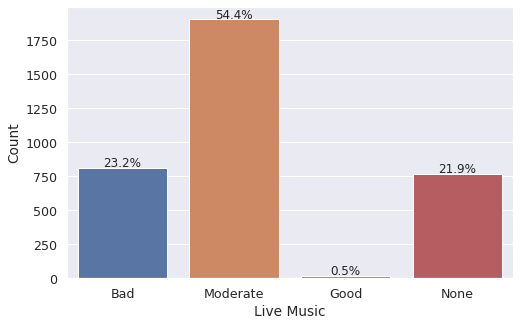

In [129]:
# Plotting the frequency of live music status

plt.figure(figsize = (8, 5));
cntplt = sns.countplot(data = df, x = 'Live Music', order = ['Bad', 'Moderate', 'Good', 'None']);
countplot_labeling(cntplt, df)
plt.xlabel('Live Music');
plt.ylabel('Count');

**`Comedy Gigs Status`**

#### Observations:

Only 0.5% of restaurants have good live music. 21.9% of them provide no live music.

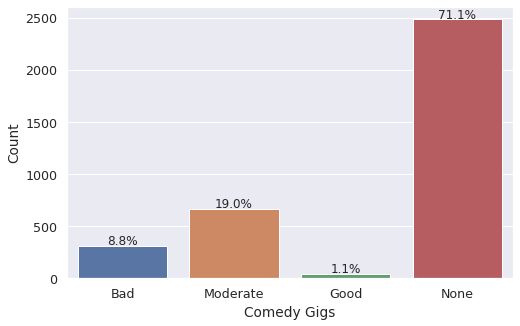

In [131]:
# Plotting the frequency of comedy gigs status

plt.figure(figsize = (8, 5));
cntplt = sns.countplot(data = df, x = 'Comedy Gigs', order = ['Bad', 'Moderate', 'Good', 'None']);
countplot_labeling(cntplt, df)
plt.xlabel('Comedy Gigs');
plt.ylabel('Count');

#### Observations:

Only 1.1% of restaurants have good comedy gigs. 71.1% of them provide no comedy gigs.

**`Value Deals Status`**

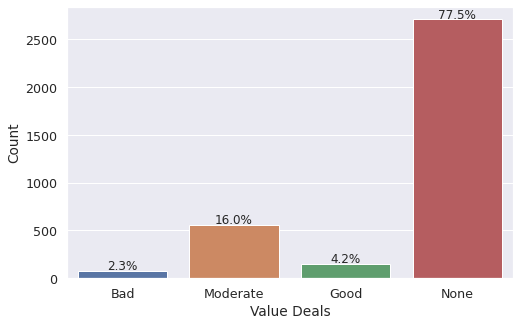

In [138]:
# Plotting the frequency of value deals status

plt.figure(figsize = (8, 5));
cntplt = sns.countplot(data = df, x = 'Value Deals', order = ['Bad', 'Moderate', 'Good', 'None']);
countplot_labeling(cntplt, df)
plt.xlabel('Value Deals');
plt.ylabel('Count');

#### Observations:

Only 4.1% of restaurants have good value deals. 77.5% of them have none.

**`Live Sports Status`**

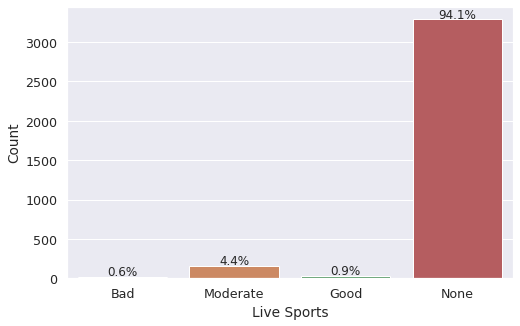

In [139]:
# Plotting the frequency of live sports status

plt.figure(figsize = (8, 5));
cntplt = sns.countplot(data = df, x = 'Live Sports', order = ['Bad', 'Moderate', 'Good', 'None']);
countplot_labeling(cntplt, df)
plt.xlabel('Live Sports');
plt.ylabel('Count');

#### Observations:

~ 95% of restaurants have no live sports.

**`Ambience`**

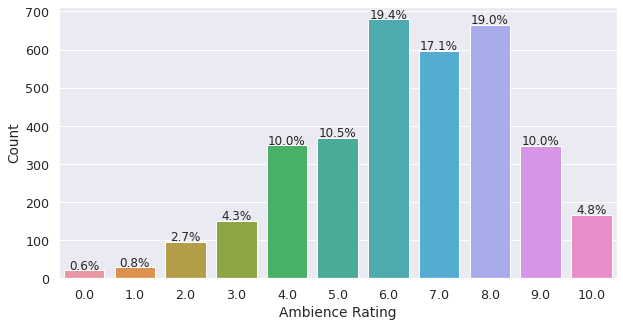

In [140]:
# Plotting the frequency of ambience rating

plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'Ambience');
countplot_labeling(cntplt, df)
plt.xlabel('Ambience Rating');
plt.ylabel('Count');

#### Observations:

Majority of restaurants have ambience rating above 50%.

**`Liveliness`**

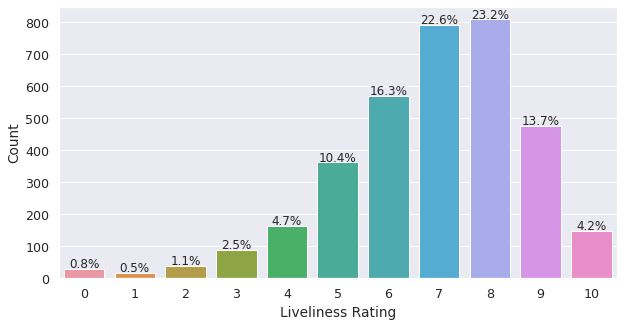

In [141]:
# Plotting the frequency of liveliness rating

plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'Lively');
countplot_labeling(cntplt, df)
plt.xlabel('Liveliness Rating');
plt.ylabel('Count');

#### Observations:

Majority of restaurants have liveliness rating of about 50%.

**`Service`**

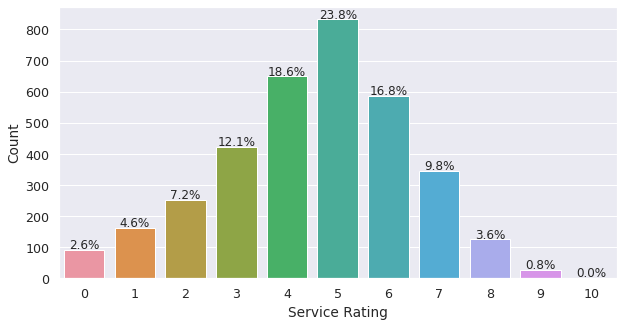

In [142]:
# Plotting the frequency of service ratings

plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'Service');
countplot_labeling(cntplt, df)
plt.xlabel('Service Rating');
plt.ylabel('Count');

**`Comfortability`**

#### Observations:

Most restaurants have service ratings of 50% or lower.

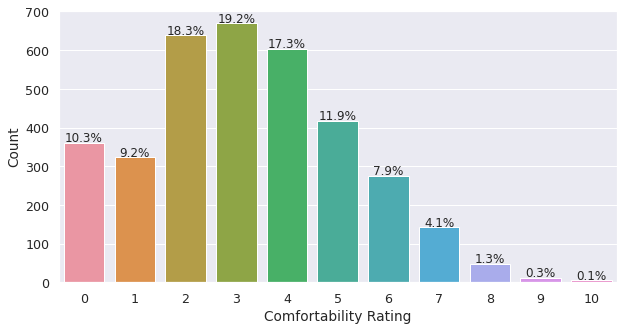

In [143]:
# Plotting the frequency of comfortability ratings

plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'Comfortability');
countplot_labeling(cntplt, df)
plt.xlabel('Comfortability Rating');
plt.ylabel('Count');

#### Observations:

Vast majority of restaurants have comfortability ratings of 50% or lower.

**`Privacy`**

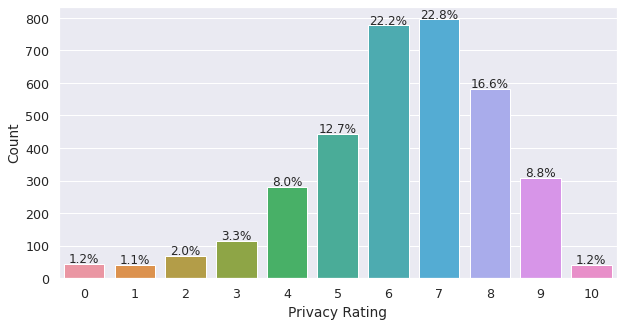

In [144]:
# Plotting the frequency of privacy ratings

plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'Privacy');
countplot_labeling(cntplt, df)
plt.xlabel('Privacy Rating');
plt.ylabel('Count');

#### Observations:

Vast majority of restaurants have privacy ratings of 50% or more.

**`Order Wait Time`**

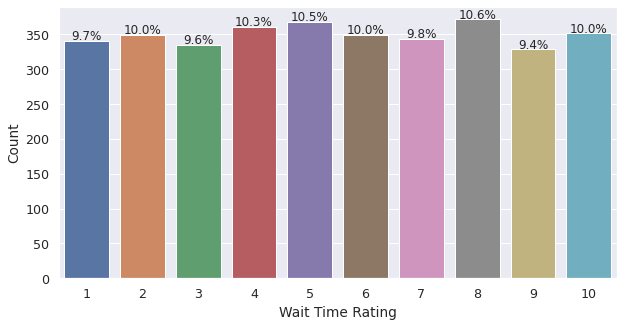

In [145]:
# Plotting the frequency of wait time ratings

plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'Wait Time');
countplot_labeling(cntplt, df)
plt.xlabel('Wait Time Rating');
plt.ylabel('Count');

#### Observations:

The wait time of different restaurants is almost uniformly distributed between 1 to 10.

**`Days Since Opening`**

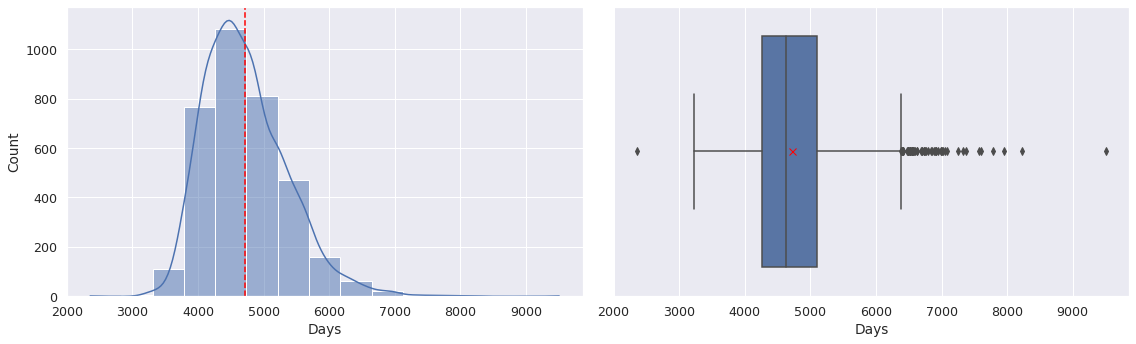

In [146]:
# mean value
mv = df['Days Since Opening'].mean()

plt.figure(figsize = (16, 5));
plt.subplot(121)
sns.histplot(data = df, x = 'Days Since Opening', kde = True, bins = 15);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Days')
plt.subplot(122)
sns.boxplot(data = df, x = 'Days Since Opening', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Days')
plt.tight_layout()

#### Observations:

The average age of restaurants is about 4700 days.

**`Months Since Opening`**

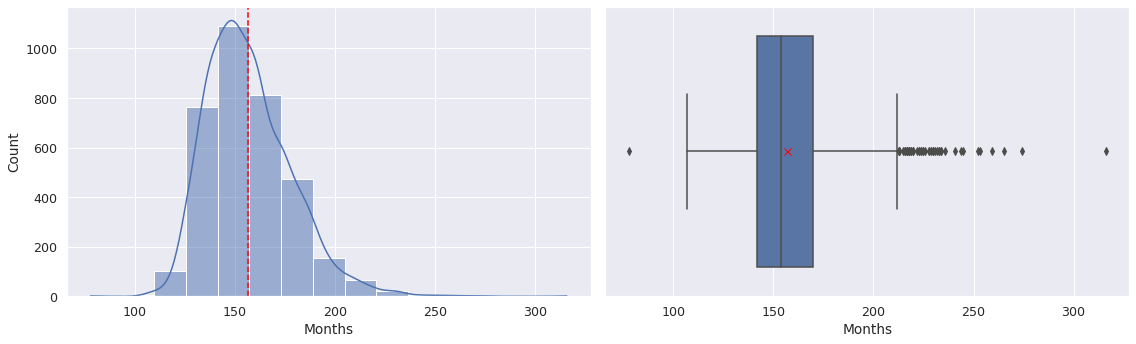

In [148]:
# mean value
mv = df['Months Since Opening'].mean()

plt.figure(figsize = (16, 5));
plt.subplot(121)
sns.histplot(data = df, x = 'Months Since Opening', kde = True, bins = 15);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Months')
plt.subplot(122)
sns.boxplot(data = df, x = 'Months Since Opening', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Months')
plt.tight_layout()

#### Observations:

The average age of restaurants is about 156 months or 13 years.

**`Facebook Popularity Quotient`**

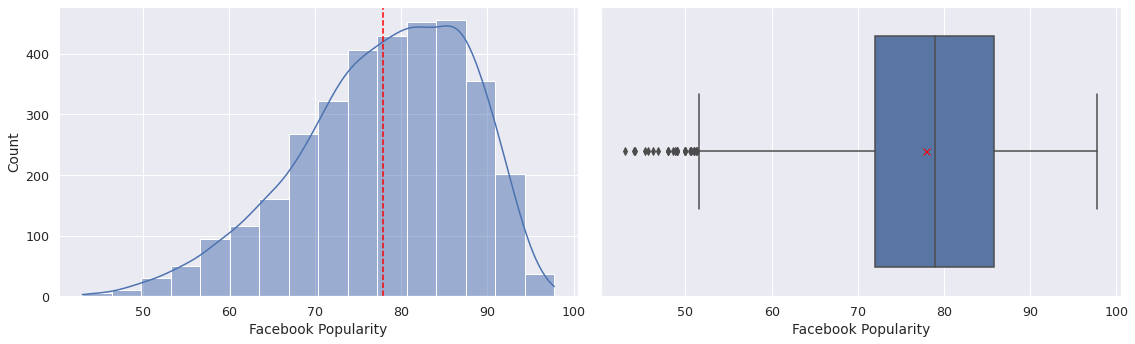

In [150]:
# mean value
mv = df['Facebook Popularity'].mean()

plt.figure(figsize = (16, 5));
plt.subplot(121)
sns.histplot(data = df, x = 'Facebook Popularity', kde = True, bins = 16);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Facebook Popularity')
plt.subplot(122)
sns.boxplot(data = df, x = 'Facebook Popularity', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Facebook Popularity')
plt.tight_layout()

#### Observations:

The distribution of Facebook popularity is left skewed with several outliers on the left side of the boxplot.

**`Instagram Popularity Quotient`**

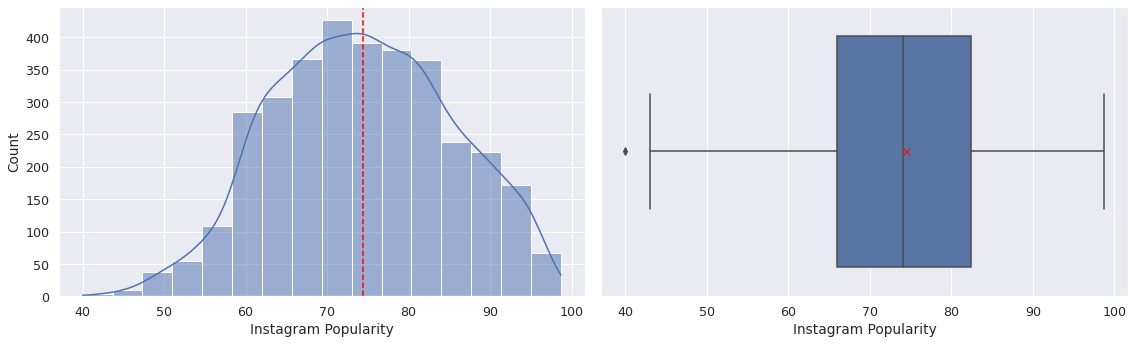

In [151]:
# mean value
mv = df['Instagram Popularity'].mean()

plt.figure(figsize = (16, 5));
plt.subplot(121)
sns.histplot(data = df, x = 'Instagram Popularity', kde = True, bins = 16);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Instagram Popularity')
plt.subplot(122)
sns.boxplot(data = df, x = 'Instagram Popularity', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Instagram Popularity')
plt.tight_layout()

#### Observations:

The distribution of Instagram popularity is also left-skewed.

**`Scaled Annual Turnover (in Millions INR)`**

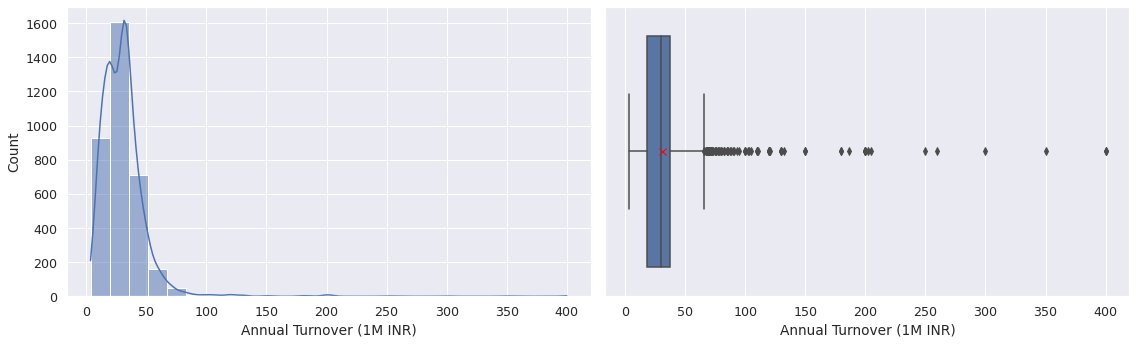

In [152]:
# mean value
mv = df['Scaled Turnover'].mean()

plt.figure(figsize = (16, 5));
plt.subplot(121)
sns.histplot(data = df, x = 'Scaled Turnover', kde = True, bins = 25);
#plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Annual Turnover (1M INR)')
plt.subplot(122)
sns.boxplot(data = df, x = 'Scaled Turnover', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Annual Turnover (1M INR)')
plt.tight_layout()

#### Observations:

The average annual turnover is about 30M INR. Its distribution is very right-skewed, with many outliers on the right side of the boxplot, which after 200 become very sparse.

### Bivariate Analysis

The dataset consists of many columns and features, making the number of potential bivariate analysis plots very large. Therefore, we only concentrate on the most important predictors and their influence on the annual turnover.

**`Correlation of Numerical Variables`**






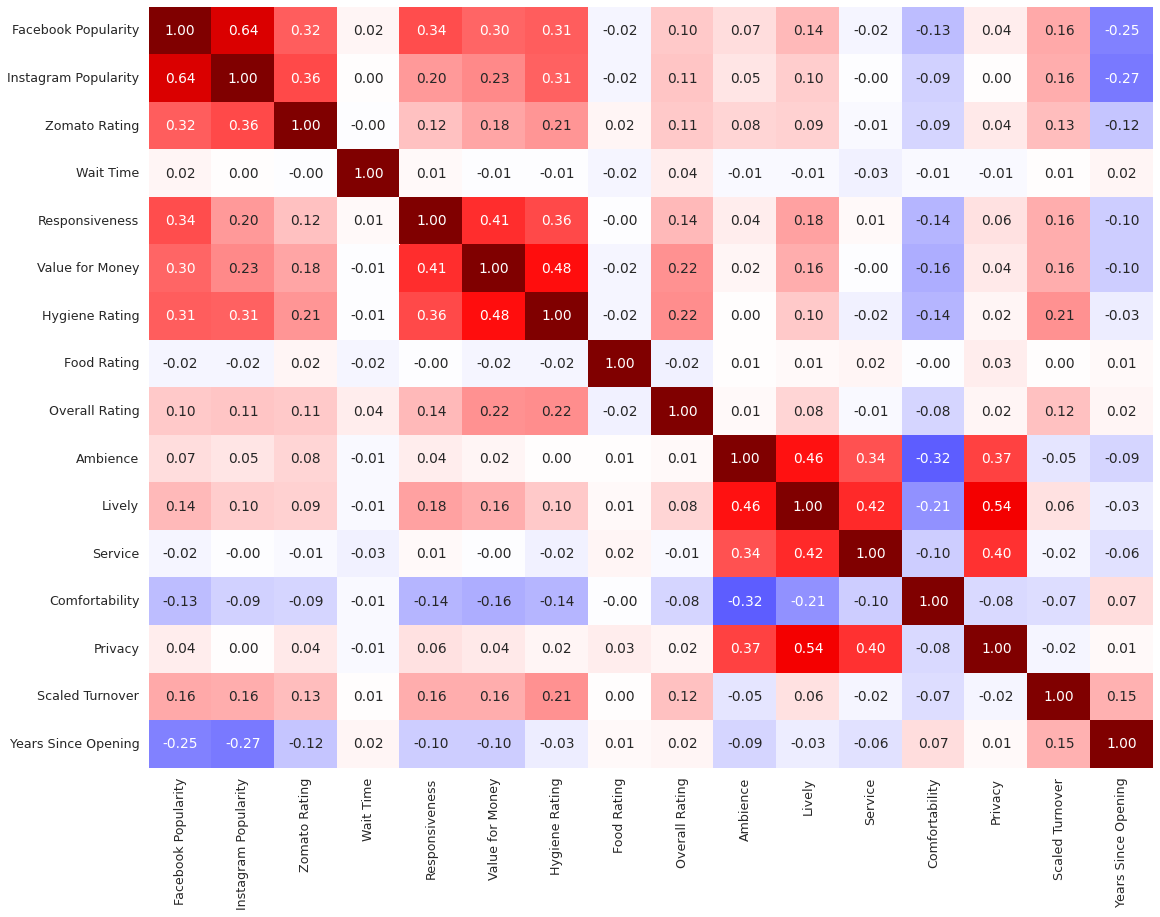

In [155]:
# making a list of numerical variables
num_vars = df.select_dtypes(include = np.number).columns.tolist()
num_vars.remove('Registration Number')
num_vars.remove('Annual Turnover')
num_vars.remove('Months Since Opening')  
num_vars.remove('Days Since Opening')  
num_vars.remove('Opening Year')  

# Generating the heatmap of numerical variables correlations
plt.figure(figsize = (18, 14));
corr_fig = sns.heatmap(df[num_vars].corr(), vmin = -1, vmax = 1, annot = True, cmap = 'seismic', fmt = '.2f', cbar = False);


#### Observations:

*   Turnover is positively correlated with social media popularity, responsiveness, value for money, hygiene rating and overall rating, although none of the correlation coefficients exceeds 0.21.
*   Older restaurants are expected to generate more revenue.

**`Turnover vs. Years Since Opening`**


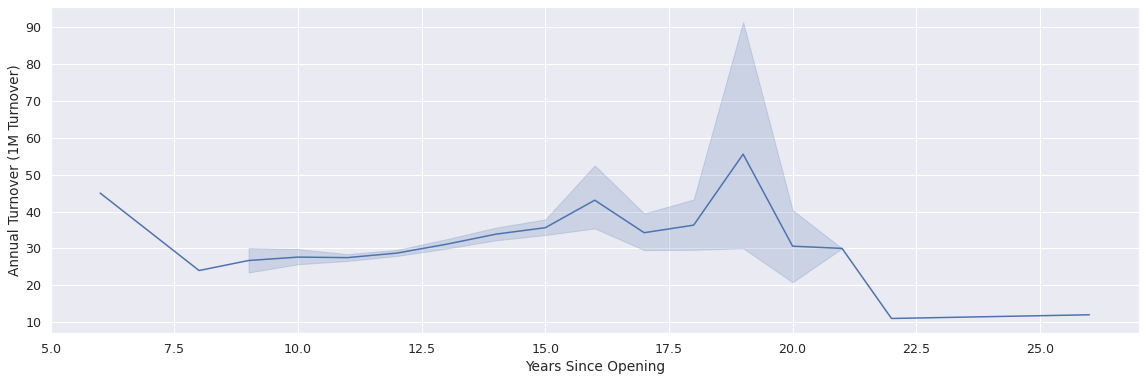

In [156]:
# Variation of turnover with the number of years since opening
plt.figure(figsize = (19.5, 6))
sns.lineplot(data = df, x = 'Years Since Opening', y = 'Scaled Turnover', ci = 90);
plt.xlabel('Years Since Opening');
plt.ylabel('Annual Turnover (1M Turnover)');

#### Notes:

Since the plots of days/months since opening are too noisy, and represent the same insights as the plot of years since opening, we will drop them. 

In [157]:
df.drop(columns = ['Months Since Opening', 'Days Since Opening'], inplace = True)

**`Turnover vs. Restaurant Location`**


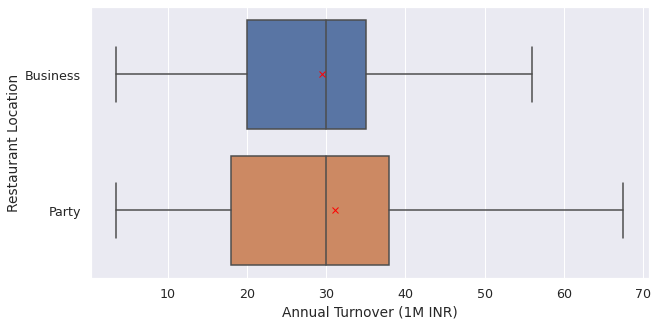

In [159]:
# Variation of turnover with restaurant location
plt.figure(figsize = (10, 5));
sns.boxplot(data = df, x = 'Scaled Turnover', y = 'Location', showfliers = False, showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '6'});
plt.xlabel('Annual Turnover (1M INR)');
plt.ylabel('Restaurant Location');

#### Observations:

The location of a restaurant (part or business hub) doesn't have a remarkable income on its turnover.

**`Annual Turnover vs. Social Media Popularity`**


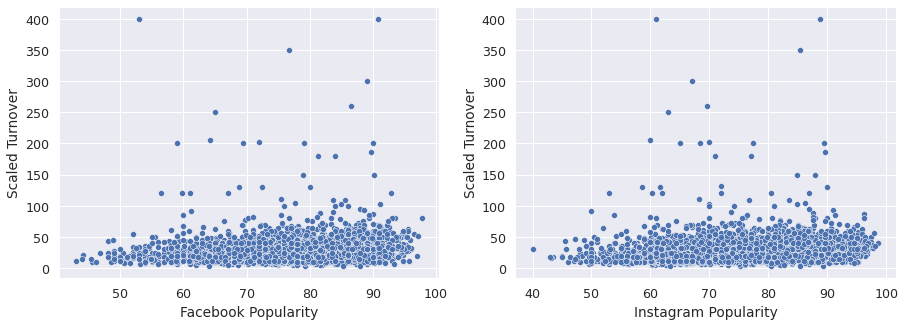

In [160]:
# Making a dataset of devices with high-quality selfie cameras
plt.figure(figsize = (15, 5));
plt.subplot(121);
sns.scatterplot(data = df, x = 'Facebook Popularity', y = 'Scaled Turnover');
plt.subplot(122);
sns.scatterplot(data = df, x = 'Instagram Popularity', y = 'Scaled Turnover');

#### Observations:

There are small and positive correlations between the social media ratings and the annual turnover of the restaurants.

**`Annual Turnover vs. Phyical Properties of a Restaurant`**


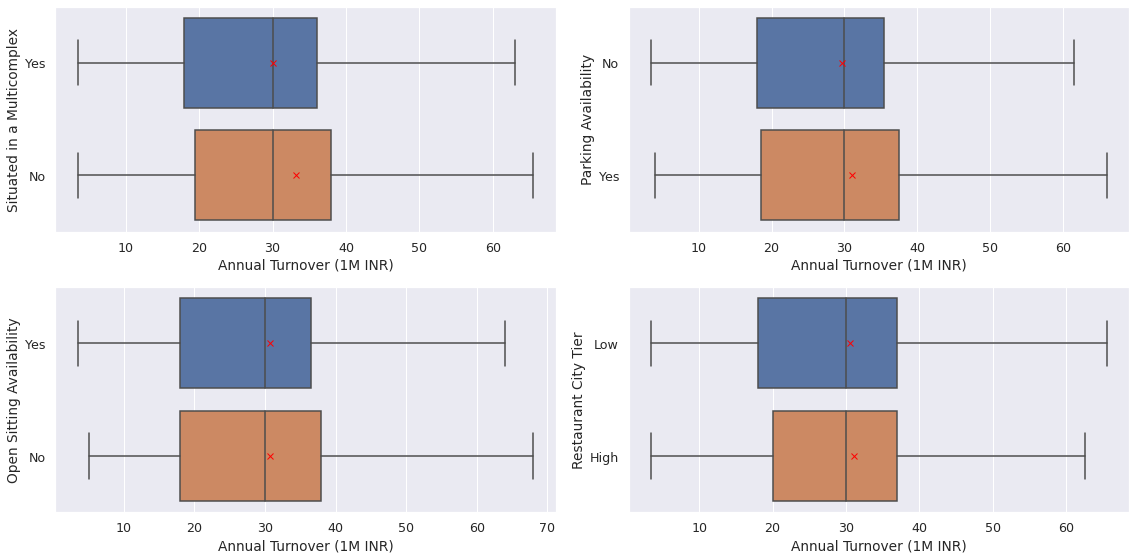

In [161]:
# Variation of turnover wrt being situated in a multicomplex
plt.figure(figsize = (16, 8));
plt.subplot(221)
sns.boxplot(data = df, x = 'Scaled Turnover', y = 'Multicomplex', showfliers = False, showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '6'});
plt.xlabel('Annual Turnover (1M INR)');
plt.ylabel('Situated in a Multicomplex');
# Variation of turnover wrt parking availability
plt.subplot(222)
sns.boxplot(data = df, x = 'Scaled Turnover', y = 'Parking', showfliers = False, showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '6'});
plt.xlabel('Annual Turnover (1M INR)');
plt.ylabel('Parking Availability');
# Variation of turnover wrt parking availability
plt.subplot(223)
sns.boxplot(data = df, x = 'Scaled Turnover', y = 'Open Sitting', showfliers = False, showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '6'});
plt.xlabel('Annual Turnover (1M INR)');
plt.ylabel('Open Sitting Availability');
# Variation of turnover wrt city Tier
plt.subplot(224)
sns.boxplot(data = df, x = 'Scaled Turnover', y = 'City Tier', showfliers = False, showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '6'});
plt.xlabel('Annual Turnover (1M INR)');
plt.ylabel('Restaurant City Tier');
plt.tight_layout()

#### Observations:

Availability of parking spots and open sittings, the tier of the city tier of a restaurant and whether a restaurant is located in a multicomplex or not have nearly no impact on its annual turnover.

**`Turnover vs. Restaurant Type`**


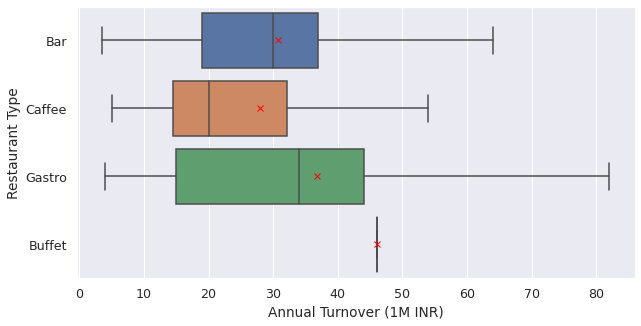

In [162]:
# Variation of annual turnover with restaurant type

plt.figure(figsize = (10, 5))
sns.boxplot(data = df, x = 'Scaled Turnover', y = 'Type', showfliers = False, showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '6'});
plt.xlabel('Annual Turnover (1M INR)');
plt.ylabel('Restaurant Type');

#### Observations:

Buffets generate the highest revenue but data points for them are really limited. After that, Gastros produce the highest turnover.

**`Turnover vs. Restaurant Theme`**


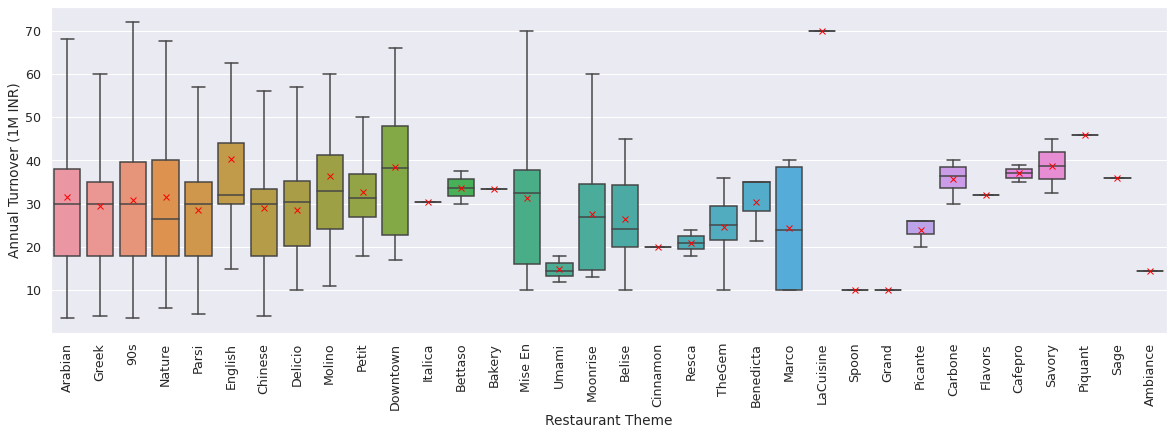

In [163]:
# Variation of annual turnover with restaurant theme

plt.figure(figsize = (20, 6))
sns.boxplot(data = df, y = 'Scaled Turnover', x = 'Theme', showfliers = False, showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '6'});
plt.ylabel('Annual Turnover (1M INR)');
plt.xlabel('Restaurant Theme');
plt.xticks(rotation = 90);

#### Observations:

LaCuisine theme somewhat stands out (although there aren't many points avaikable for this theme), but regardless, the theme of a restaurant doesn't appear to be an important factor in revenue generation.

**`Turnover vs. Bonus Amenities`**

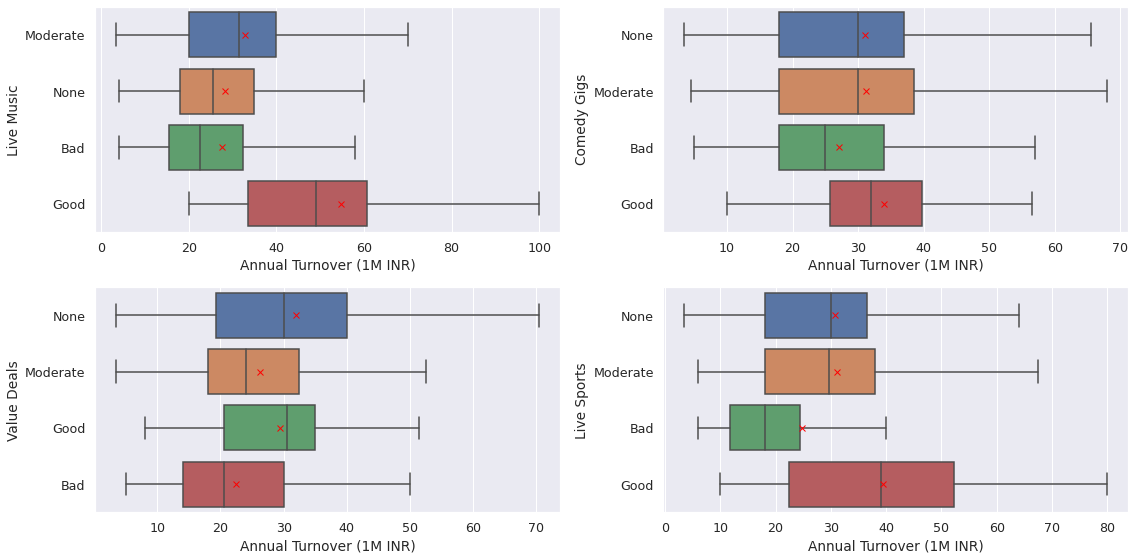

In [165]:
# Variation of turnover wrt live music status
plt.figure(figsize = (16, 8));
plt.subplot(221)
sns.boxplot(data = df, x = 'Scaled Turnover', y = 'Live Music', showfliers = False, showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '6'});
plt.xlabel('Annual Turnover (1M INR)');
plt.ylabel('Live Music');
# Variation of turnover wrt comedy gigs status
plt.subplot(222)
sns.boxplot(data = df, x = 'Scaled Turnover', y = 'Comedy Gigs', showfliers = False, showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '6'});
plt.xlabel('Annual Turnover (1M INR)');
plt.ylabel('Comedy Gigs');
# Variation of turnover wrt value deals status
plt.subplot(223)
sns.boxplot(data = df, x = 'Scaled Turnover', y = 'Value Deals', showfliers = False, showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '6'});
plt.xlabel('Annual Turnover (1M INR)');
plt.ylabel('Value Deals');
# Variation of turnover wrt live sports status
plt.subplot(224)
sns.boxplot(data = df, x = 'Scaled Turnover', y = 'Live Sports', showfliers = False, showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '6'});
plt.xlabel('Annual Turnover (1M INR)');
plt.ylabel('Live Sports');
plt.tight_layout()

#### Observations:

Unsurprisingly, restaurants with good bonus amenities generate more revenue.

**`Turnover vs. Endorsement Status`**

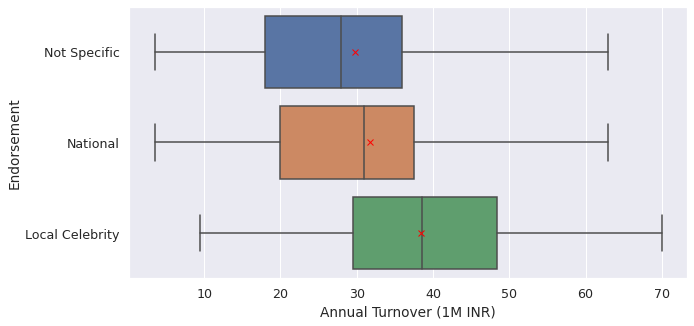

In [166]:
# Variation of annual turnover with endorsement status

plt.figure(figsize = (10, 5))
sns.boxplot(data = df, x = 'Scaled Turnover', y = 'Endorsement', showfliers = False, showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '6'});
plt.xlabel('Annual Turnover (1M INR)');
plt.ylabel('Endorsement');

#### Observations:

While the endorsement of national celebrities doesn't change the annual turnover significantly with respect to the restaurants which have no endorsements, receiving an endorsement from a local celebrity has a notable and positive impact on the turnover. 

**`Turnover vs. Some Rating Features`**

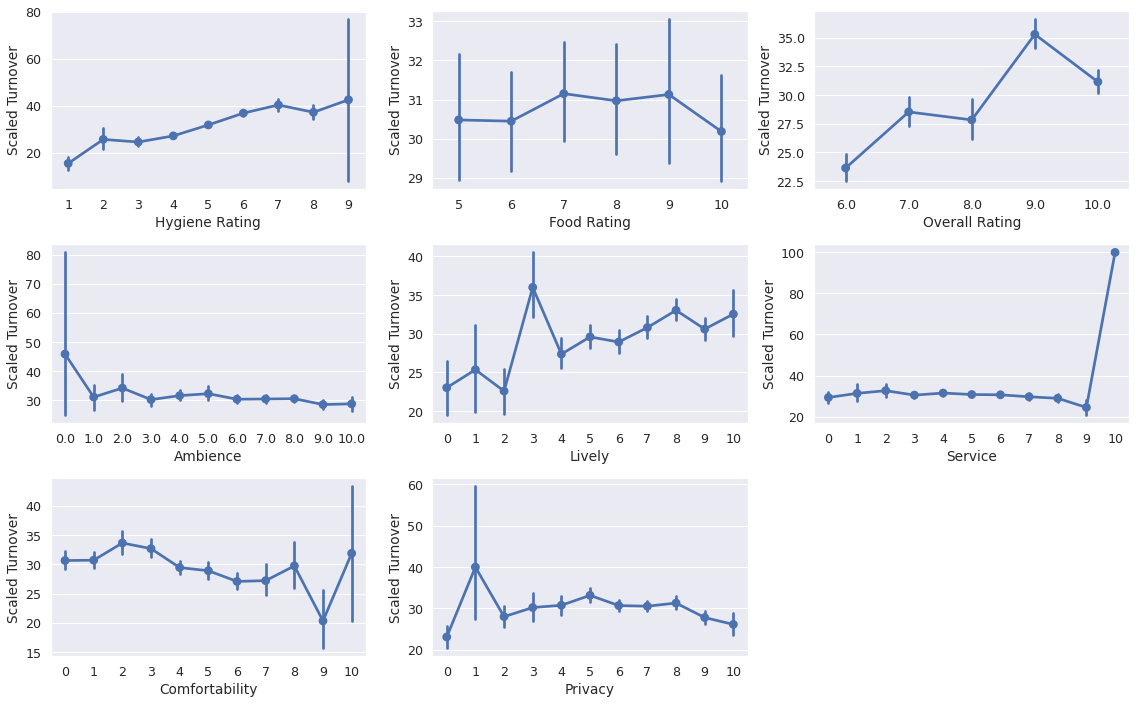

In [169]:
selected_rating_features = ['Hygiene Rating', 'Food Rating', 'Overall Rating', 'Ambience', 'Lively', 
                            'Service', 'Comfortability', 'Privacy'];
plt.figure(figsize = (16, 10));
for i, text in enumerate(selected_rating_features):
  plt.subplot(3, 3, i+1);
  sns.pointplot(data = df, x = text, y = 'Scaled Turnover', ci = 90);

plt.tight_layout()

#### Observations:

The annual turnover almost consistently increases with the overall rating, hygiene rating and the liveliness score, but either has no notable relationship or has a very complex one with other ratings and scores. 

## Data Preprocessing



### Missing Value Treatment

*   We found out that, efter assigning 'None' to np.nan values of a few features, there are still *five numerical columns* with missing values. 

*   We also estabslished that different variables typically vary significantly with the *type*, *theme* and *cuisine*. So among different (categorical) variables, we choose a couple of these features to group the data and use the measures of central tendency of each group to impute the missing values.

*   We observed that all numerical variables have fairly skewed distributions, implying that *median* is a much better candidate than mean for imputation of missing values.   


In [170]:
# Let's check the columns with missing values again
df.isnull().sum()

Registration Number            0
Annual Turnover                0
Cuisine                        0
Location                       0
Opening Day of Restaurant      0
Facebook Popularity           99
Endorsement                    0
Instagram Popularity          56
Fire Audit                     0
Liquor License                 0
Multicomplex                   0
Parking                        0
Open Sitting                   0
Tier                          49
Type                           0
Theme                          0
Zomato Rating                  0
City Tier                      0
Wait Time                      0
Responsiveness                 0
Value for Money                0
Hygiene Rating                 0
Food Rating                    0
Overall Rating               212
Live Music                     0
Comedy Gigs                    0
Value Deals                    0
Live Sports                    0
Ambience                      25
Lively                         0
Service   

In [171]:
# Storing columns with missing values in a list
cols_with_nans = (df.isnull().sum()).loc[df.isnull().sum() > 0].index.tolist()

print('Columns with missing values:', cols_with_nans)

Columns with missing values: ['Facebook Popularity', 'Instagram Popularity', 'Tier', 'Overall Rating', 'Ambience']


In [172]:
# Doing a loop on all columns with null values to fill them out with the median of the corresponding group
df_imputed = df.copy()  # making a new copy of dataset to which imputation is applied
cols_with_nans.remove('Tier')
num_cols_with_nans = cols_with_nans.copy()  # listing only numerical cols with missing values
for col in num_cols_with_nans:
  df_imputed[col] = df[col].fillna(value = 
                                   df.groupby(['Type', 'Theme'])[col].transform('median'))
  
# Storing columns with missing values in a list
cols_with_nans = (df_imputed.isnull().sum()).loc[df_imputed.isnull().sum() > 0].index.tolist()
print('Columns with missing values after the first round of imputation:', cols_with_nans, end = '\n'*2)
df_imputed.isnull().sum()

Columns with missing values after the first round of imputation: ['Facebook Popularity', 'Tier', 'Overall Rating']



Registration Number           0
Annual Turnover               0
Cuisine                       0
Location                      0
Opening Day of Restaurant     0
Facebook Popularity           1
Endorsement                   0
Instagram Popularity          0
Fire Audit                    0
Liquor License                0
Multicomplex                  0
Parking                       0
Open Sitting                  0
Tier                         49
Type                          0
Theme                         0
Zomato Rating                 0
City Tier                     0
Wait Time                     0
Responsiveness                0
Value for Money               0
Hygiene Rating                0
Food Rating                   0
Overall Rating               21
Live Music                    0
Comedy Gigs                   0
Value Deals                   0
Live Sports                   0
Ambience                      0
Lively                        0
Service                       0
Comforta

In [173]:
# This time we replace theme with cuisine to finish the imputation
cols_with_nans.remove('Tier')
num_cols_with_nans = cols_with_nans.copy()  # listing only numerical cols with missing values
for col in num_cols_with_nans:
  df_imputed[col] = df[col].fillna(value = 
                                   df.groupby(['Type', 'Cuisine'])[col].transform('median'))
  
# Storing columns with missing values in a list
cols_with_nans = (df_imputed.isnull().sum()).loc[df_imputed.isnull().sum() > 0].index.tolist()
print('Columns with missing values after the first round of imputation:', cols_with_nans, end = '\n'*2)
df_imputed.isnull().sum()

Columns with missing values after the first round of imputation: ['Tier', 'Overall Rating']



Registration Number           0
Annual Turnover               0
Cuisine                       0
Location                      0
Opening Day of Restaurant     0
Facebook Popularity           0
Endorsement                   0
Instagram Popularity          0
Fire Audit                    0
Liquor License                0
Multicomplex                  0
Parking                       0
Open Sitting                  0
Tier                         49
Type                          0
Theme                         0
Zomato Rating                 0
City Tier                     0
Wait Time                     0
Responsiveness                0
Value for Money               0
Hygiene Rating                0
Food Rating                   0
Overall Rating                5
Live Music                    0
Comedy Gigs                   0
Value Deals                   0
Live Sports                   0
Ambience                      0
Lively                        0
Service                       0
Comforta

In [174]:
# Completing the imputation of overall rating by using only restaurant type for grouping
df_imputed['Overall Rating'] = df['Overall Rating'].fillna(value = df.groupby(['Type'])['Overall Rating'].transform('median'))
  
# Storing columns with missing values in a list
cols_with_nans = (df_imputed.isnull().sum()).loc[df_imputed.isnull().sum() > 0].index.tolist()
print('Columns with missing values after the first round of imputation:', cols_with_nans, end = '\n'*2)
df_imputed.isnull().sum()

Columns with missing values after the first round of imputation: ['Tier', 'Overall Rating']



Registration Number           0
Annual Turnover               0
Cuisine                       0
Location                      0
Opening Day of Restaurant     0
Facebook Popularity           0
Endorsement                   0
Instagram Popularity          0
Fire Audit                    0
Liquor License                0
Multicomplex                  0
Parking                       0
Open Sitting                  0
Tier                         49
Type                          0
Theme                         0
Zomato Rating                 0
City Tier                     0
Wait Time                     0
Responsiveness                0
Value for Money               0
Hygiene Rating                0
Food Rating                   0
Overall Rating                1
Live Music                    0
Comedy Gigs                   0
Value Deals                   0
Live Sports                   0
Ambience                      0
Lively                        0
Service                       0
Comforta

In [175]:
# There is only one entry with type as buffet. We'll fill that using the overall rating median of all entries. 
df_imputed.loc[df_imputed['Overall Rating'].isnull(), 'Overall Rating'] = df_imputed['Overall Rating'].median()
df_imputed.isnull().sum()

Registration Number           0
Annual Turnover               0
Cuisine                       0
Location                      0
Opening Day of Restaurant     0
Facebook Popularity           0
Endorsement                   0
Instagram Popularity          0
Fire Audit                    0
Liquor License                0
Multicomplex                  0
Parking                       0
Open Sitting                  0
Tier                         49
Type                          0
Theme                         0
Zomato Rating                 0
City Tier                     0
Wait Time                     0
Responsiveness                0
Value for Money               0
Hygiene Rating                0
Food Rating                   0
Overall Rating                0
Live Music                    0
Comedy Gigs                   0
Value Deals                   0
Live Sports                   0
Ambience                      0
Lively                        0
Service                       0
Comforta

#### Notes:

The only remaining column with missing values is Tier, which is a categorical feature. As shown before, restaurants are overwhelmingly high-tier. Therefore, we will assign high-tier to all missing tiers.

In [179]:
df_imputed.loc[df_imputed.Tier.isnull(), 'Tier'] = 'High'
df_imputed.isnull().sum()

Registration Number          0
Annual Turnover              0
Cuisine                      0
Location                     0
Opening Day of Restaurant    0
Facebook Popularity          0
Endorsement                  0
Instagram Popularity         0
Fire Audit                   0
Liquor License               0
Multicomplex                 0
Parking                      0
Open Sitting                 0
Tier                         0
Type                         0
Theme                        0
Zomato Rating                0
City Tier                    0
Wait Time                    0
Responsiveness               0
Value for Money              0
Hygiene Rating               0
Food Rating                  0
Overall Rating               0
Live Music                   0
Comedy Gigs                  0
Value Deals                  0
Live Sports                  0
Ambience                     0
Lively                       0
Service                      0
Comfortability               0
Privacy 

In [180]:
# Dropping the only buffet restaurant
df_imputed.drop(index = df_imputed.loc[df_imputed.Type == 'Buffet'].index.tolist(), 
                axis = 0, inplace = True)
df_imputed.reset_index(drop = True, inplace = True)
df_imputed.head()

,Registration Number,Annual Turnover,Cuisine,Location,Opening Day of Restaurant,Facebook Popularity,Endorsement,Instagram Popularity,Fire Audit,Liquor License,Multicomplex,Parking,Open Sitting,Tier,Type,Theme,Zomato Rating,City Tier,Wait Time,Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Rating,Live Music,Comedy Gigs,Value Deals,Live Sports,Ambience,Lively,Service,Comfortability,Privacy,Scaled Turnover,Cuisine1,Cuisine2,Opening Year,Years Since Opening
0,60001,42000000,"indian,irish",Business,2009-02-14,84.300,Not Specific,95.800,Yes,Yes,Yes,No,Yes,High,Bar,Arabian,3,Low,2,5,5,5,7,10.000,Moderate,None,None,None,8.000,8,6,6,6,42.000,indian,irish,2009,13
1,60002,50000000,"indian,irish",Party,2008-09-29,85.400,National,85.000,Yes,Yes,Yes,Yes,No,High,Bar,Greek,3,Low,6,6,6,7,8,9.000,None,Moderate,None,None,5.000,7,7,3,8,50.000,indian,irish,2008,14
2,60003,32500000,"tibetan,italian",Business,2011-07-30,85.000,National,68.200,Yes,Yes,Yes,Yes,No,High,Bar,90s,3,Low,2,6,5,3,7,8.000,Bad,None,None,None,7.000,10,5,2,8,32.500,tibetan,italian,2011,11
3,60004,110000000,"turkish,nigerian",Party,2008-11-30,85.600,National,83.600,No,Yes,Yes,Yes,Yes,Low,Bar,Arabian,3,High,7,6,5,6,8,9.000,Moderate,None,None,None,7.000,7,4,3,5,110.000,turkish,nigerian,2008,14
4,60005,20000000,"irish,belgian",Party,2010-02-22,80.000,National,76.800,Yes,Yes,Yes,Yes,Yes,High,Bar,Greek,3,Low,10,5,6,4,8,6.000,None,Bad,None,None,7.000,6,2,4,6,20.000,irish,belgian,2010,12


#### Notes:

Since there is only one buffet restaurant, we'll drop it, as it indicates not much can be said about buffet restaurants from one data point.

### Post-imputation EDA (brief)

In [181]:
# Making a dataframe of statistical properties of columns before and after imputations
cols_with_nans = (df.isnull().sum()).loc[df.isnull().sum() > 0].index.tolist()
cols_with_nans.remove('Tier')
num_cols_with_nans = cols_with_nans.copy()

# dataframe contaning the percentage of change in means and medians pre/post-imputation
df_stats_nan_cols = pd.DataFrame({'Columns': cols_with_nans})

for i, col in enumerate(cols_with_nans):
  df_stats_nan_cols.loc[i, 'Mean Change (%)'] = (df_imputed[col].mean() - df[col].mean())/df[col].mean()*100
  df_stats_nan_cols.loc[i, 'Median Change (%)'] = (df_imputed[col].median() - df[col].median())/df[col].median()*100

df_stats_nan_cols

,Columns,Mean Change (%),Median Change (%)
0,Facebook Popularity,0.024,0.000
1,Instagram Popularity,0.015,0.047
2,Overall Rating,0.371,0.000
3,Ambience,0.039,0.000


In [182]:
# Deleting unhelpful features
df_imputed.drop(columns = ['Registration Number', 'Opening Day of Restaurant', 'Annual Turnover', 'Opening Year'],
                axis = 1, inplace = True)

#### Notes:

We dropped the variables that are fully unique, or have another predictor representing their influence.

### Outlier Check

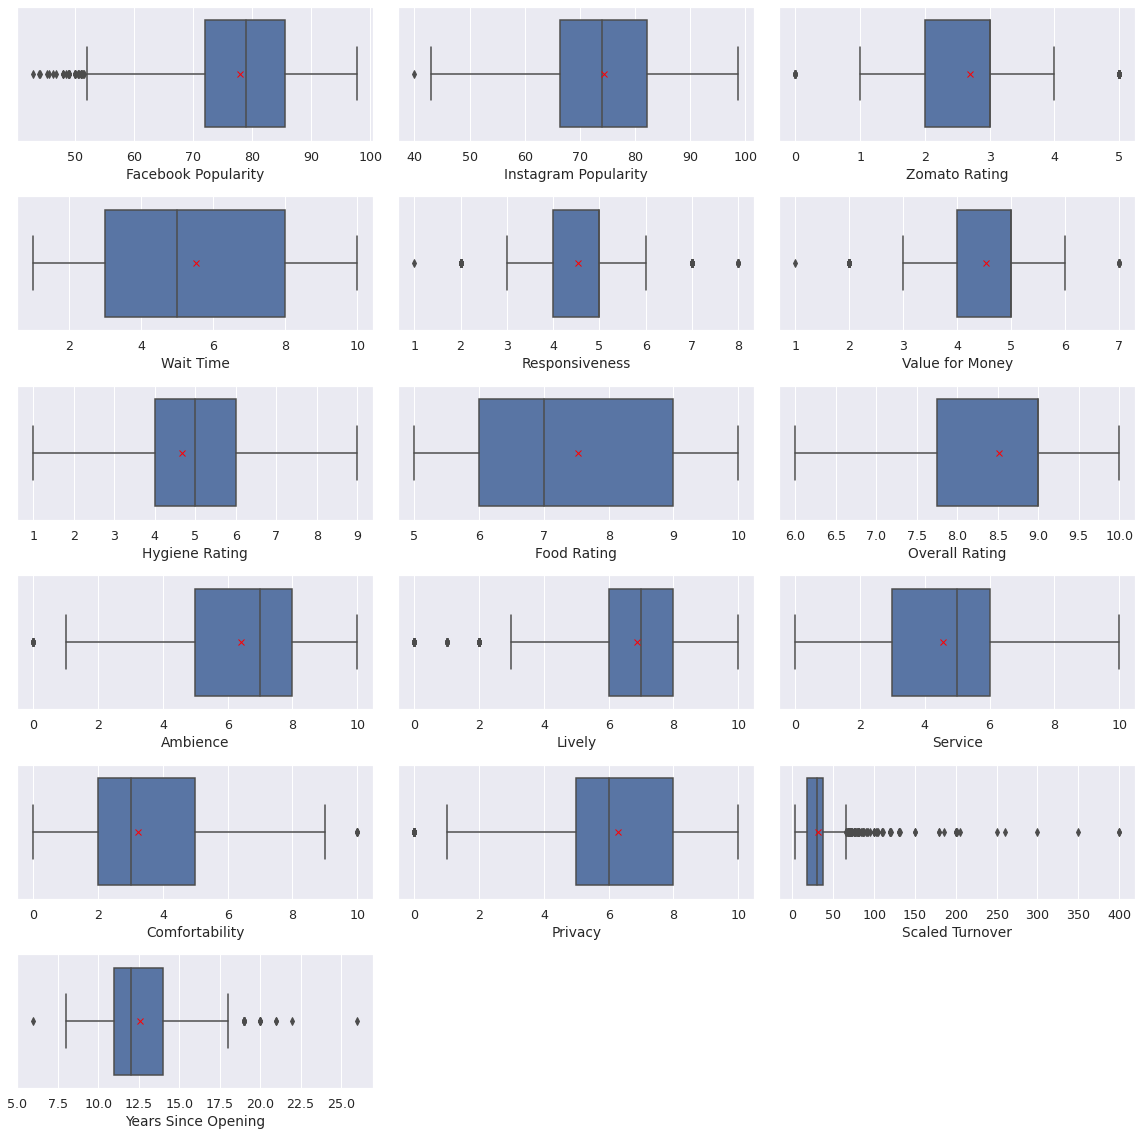

In [183]:
# Listing all numerical columns
num_cols = df_imputed.select_dtypes(include = np.number).columns.tolist()

# Checking the outliers of the numerical variables
plt.figure(figsize = (16, 16))
for i, col in enumerate(num_cols):
  plt.subplot(6, 3, i+1);
  sns.boxplot(data = df_imputed, x = col, showmeans = True,
              meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '6'});

plt.tight_layout()

#### Observations:

Although several features reveal outliers, but they all look part of the actual data and none of them really raises a red flag. Thus, we choose to keep all the data points.

## Model Building - Linear Regression  

### Defining Auxiliary Functions

In [327]:
# Defining functions necessary to evaluate the performance of a regression model

# Defining adjusted r2 score
def adj_r2_score(y_truth, y_pred, X):
  '''This function calculates the adjusted R2 score, using the r2 score function
  of python, which becomes different fromR2, when doing multi-regression.'''

  n = X.shape[0]      # size of training/testing set 
  k = X.shape[1] - 1  # number of predictors (minus intercept) 
  R2 = r2_score(y_truth, y_pred)
  R2_adj = 1 - (n-1)/(n-k-1)*(1 - R2)

  return R2_adj

# Defining MAPE score
def mape_score(y_truth, y_pred):
  '''This function gets the prediction and ground truth and calculates the MAPE score,
  , or Mean Absolute Percentage Error, which, putting simply, measures the average of
  relative difference between predictions and actual data and reports it as a percentage.'''
  
  y_truth = y_truth.values.flatten()
  if(type(y_pred) != np.ndarray):
    y_pred = y_pred.values.flatten()
  n = len(y_truth)
  mape = 0
  for i in range(n):
    mape += 100/n*np.abs(y_truth[i] - y_pred[i])/np.abs(y_truth[i])

  return mape

# Calculating model performance
def model_performance(model, X_train, X_test, y_train, y_test, valid = True):
  '''This functions report the Mean Absolute Error (MAE), the Root Mean Square Error
  # (RMSE) and MAPE score in a dataframe table for both training and testing sets.'''
  
  performance = pd.DataFrame(columns = ['R2', 'Adj. R2', 'MAE', 'RMSE', 'MAPE Score (%)'], index = ['Train', 'Validation'])
  if(valid == False):
      performance.index = ['Train', 'Test']
  y_recon = model.predict(X_train)   # reconstructing the training set using model coefficients
  y_pred = model.predict(X_test)     # predicting the unseen testing set via model paramters

  performance.iloc[0, :] = [r2_score(y_train, y_recon), adj_r2_score(y_train, y_recon, X_train),
                            mean_absolute_error(y_train, y_recon), np.sqrt(mean_squared_error(y_train, y_recon)), 
                            mape_score(y_train, y_recon)]
  performance.iloc[1, :] = [r2_score(y_test, y_pred), adj_r2_score(y_test, y_pred, X_test),
                            mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), 
                            mape_score(y_test, y_pred)]
  return performance

### Preparing Data

In [188]:
# Choosing the features kept for regression modeling
removed_features = ['Cuisine'] 
df_model = df_imputed.drop(columns = removed_features, axis = 1)
print('List of retained features:\n', np.array(df_model.columns.tolist()), sep = '', end = '\n'*2)
print('No. of retained features:', df_model.shape[1]) 

List of retained features:
['Location' 'Facebook Popularity' 'Endorsement' 'Instagram Popularity'
 'Fire Audit' 'Liquor License' 'Multicomplex' 'Parking' 'Open Sitting'
 'Tier' 'Type' 'Theme' 'Zomato Rating' 'City Tier' 'Wait Time'
 'Responsiveness' 'Value for Money' 'Hygiene Rating' 'Food Rating'
 'Overall Rating' 'Live Music' 'Comedy Gigs' 'Value Deals' 'Live Sports'
 'Ambience' 'Lively' 'Service' 'Comfortability' 'Privacy'
 'Scaled Turnover' 'Cuisine1' 'Cuisine2' 'Years Since Opening']

No. of retained features: 33


In [189]:
# Splitting dataset into independent variables (predictors) and dependent variables (target)
X1 = df_model.drop(columns = ['Scaled Turnover'], axis = 1)
y1 = df_model['Scaled Turnover']

In [190]:
# Creating dummy variables out of categorical columns
X1 = pd.get_dummies(X1, columns = X1.select_dtypes(include = ['object', 'category']).columns.tolist(), drop_first = True)
# Adding the intercept to predictors
X1 = sm.add_constant(X1)
X1.head()

,const,Facebook Popularity,Instagram Popularity,Zomato Rating,Wait Time,Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Rating,Ambience,Lively,Service,Comfortability,Privacy,Years Since Opening,Location_Party,Endorsement_National,Endorsement_Not Specific,Fire Audit_Yes,Liquor License_Yes,Multicomplex_Yes,Parking_Yes,Open Sitting_Yes,Tier_Low,Type_Caffee,Type_Gastro,Theme_Ambiance,Theme_Arabian,Theme_Bakery,Theme_Belise,Theme_Benedicta,Theme_Bettaso,Theme_Cafepro,Theme_Carbone,Theme_Chinese,Theme_Cinnamon,Theme_Delicio,Theme_Downtown,Theme_English,Theme_Flavors,Theme_Grand,Theme_Greek,Theme_Italica,Theme_LaCuisine,Theme_Marco,Theme_Mise En,Theme_Molino,Theme_Moonrise,Theme_Nature,Theme_Parsi,Theme_Petit,Theme_Picante,Theme_Resca,Theme_Sage,Theme_Savory,Theme_Spoon,Theme_TheGem,Theme_Umami,City Tier_Low,Live Music_Good,Live Music_Moderate,Live Music_None,Comedy Gigs_Good,Comedy Gigs_Moderate,Comedy Gigs_None,Value Deals_Good,Value Deals_Moderate,Value Deals_None,Live Sports_Good,Live Sports_Moderate,Live Sports_None,Cuisine1_british,Cuisine1_chinese,Cuisine1_cuban,Cuisine1_hawaiian,Cuisine1_indian,Cuisine1_irish,Cuisine1_japanese,Cuisine1_nigerian,Cuisine1_peruvian,Cuisine1_polish,Cuisine1_swedish,Cuisine1_tibetan,Cuisine1_turkish,Cuisine1_welsh,Cuisine2_belgian,Cuisine2_british,Cuisine2_cajun,Cuisine2_cuban,Cuisine2_greek,Cuisine2_irish,Cuisine2_italian,Cuisine2_japanese,Cuisine2_jewish,Cuisine2_korean,Cuisine2_latvian,Cuisine2_nigerian,Cuisine2_salvadorian,Cuisine2_sapnish,Cuisine2_thai
0,1.000,84.300,95.800,3,2,5,5,5,7,10.000,8.000,8,6,6,6,13,0,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1.000,85.400,85.000,3,6,6,6,7,8,9.000,5.000,7,7,3,8,14,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1.000,85.000,68.200,3,2,6,5,3,7,8.000,7.000,10,5,2,8,11,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.000,85.600,83.600,3,7,6,5,6,8,9.000,7.000,7,4,3,5,14,1,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1.000,80.000,76.800,3,10,5,6,4,8,6.000,7.000,6,2,4,6,12,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [194]:
# Splitting predictors and target into training and validation sets using a 70:30 ratio 
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, train_size = 0.7, shuffle = True, random_state = 1)
print('Size of training set:', X1_train.shape)
print('Size of validation set:', X1_valid.shape)

Size of training set: (2444, 101)
Size of validation set: (1048, 101)


In [196]:
# Finding the columns corresponding to the first and last cuisine appearing in the training set
for i, text in enumerate(X1_train.columns.tolist()):
  if 'Cuisine1' in text:
    first_cuisine1 = i
    last_cuisine1 = i + df_model.Cuisine1.nunique() - 1 
    break
for i, text in enumerate(X1_train.columns.tolist()):
  if 'Cuisine2' in text:
    first_cuisine2 = i
    last_cuisine2 = i + df_model.Cuisine2.nunique() - 1 
    break

# Finding the columns corresponding to the first and last theme appearing in the training set
for i, text in enumerate(X1_train.columns.tolist()):
  if 'Theme' in text:
    first_theme = i
    last_theme = i + df_model.Theme.nunique() - 1 
    break

In [197]:
# Building a linear predictive model via statistical regression
lin_model1 = (sm.OLS(y1_train, X1_train)).fit()
print(lin_model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Scaled Turnover   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.545
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           8.01e-48
Time:                        19:39:12   Log-Likelihood:                -10746.
No. Observations:                2444   AIC:                         2.166e+04
Df Residuals:                    2360   BIC:                         2.215e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Checking the Performance of the Models

In [202]:
# Model 1's performance
M1_performance = model_performance(lin_model1, X1_train, X1_valid, y1_train, y1_valid)
M1_performance

,R2,Adj. R2,MAE,RMSE,MAPE Score (%)
Train,0.163,0.127,10.510,19.648,45.515
Validation,0.132,0.040,10.909,20.541,48.889


### Treating Multicollinearity

We will calculate the variance inflation factor (VIF) for all predictors, and drop those with VIF > 5 one by one, until there is no predictor left whose VIF > 5. Note that we typically do not show the VIF of the intercept and dummy variables (unless we set drop_dummy_const = False in our in-house VIF calculator function), as VIF does not reveal much about them. The intercept is always 1, causing it to typically have a high VIF, and the values of dummy variables of the same category are determined according to each other, implying some sort of correlation among them. The only thing we test for constant and dummay variables is that their VIFs don't become NaN or inf.

In [264]:
# Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Defining a function for calculating the VIF of all predictors
def vif_calculator(X_train, drop_dummy_const = True):
  '''This function returns the VIF for all predictors, if drop_dummy_const = False,
  and all predictors except intercept and dummy variables, if drop_dummy_const = True.'''
  
  VIF_results = pd.DataFrame({'Feature': X_train.columns.tolist()})

  for i in range(X_train.shape[1]):
    VIF_results.loc[i, 'VIF_values'] = variance_inflation_factor(X_train.values, i)
  
  const_dummy_indices = [0]  # Indices of intercept and dummy variables
  for i in range(VIF_results.shape[0]):
    if ('_' in VIF_results.loc[i, 'Feature']):
      const_dummy_indices.append(i)

  if(drop_dummy_const == True):
    VIF_results = VIF_results.drop(index = const_dummy_indices, axis = 0).reset_index(drop = True)

  return VIF_results  

# Defining a function for dropping high-VIF columnss individually and checking the performance of the resulting model
def vif_treatment(VIF_results, X_train, y_train):
  '''This function separates columns with VIF > 5 and builds regression models by removing  
  the high-VIF columns individually, and returns a dataframe containing the performance 
  properties of each model.'''

  high_vif_cols = VIF_results[VIF_results['VIF_values'] > 5].Feature.tolist()
  vif_treatment_res = pd.DataFrame(columns = ['Dropped Col.', 'R2', 'Adj. R2', 'RMSE'])
  vif_treatment_res['Dropped Col.'] = high_vif_cols

  for i in range(len(high_vif_cols)):
    X_train_temp = X_train.drop(columns = high_vif_cols[i], axis = 1)
    model_temp = (sm.OLS(y_train, X_train_temp)).fit()
    rmse = np.sqrt(mean_squared_error(y_train, model_temp.predict(X_train_temp)))
    vif_treatment_res.iloc[i, 1:] = [model_temp.rsquared, model_temp.rsquared_adj, rmse]

  return vif_treatment_res

In [265]:
# Demonstrating the VIF of all predictors except dummy variables and constant
VIF_results1 = vif_calculator(X1_train)
VIF_results1

,Feature,VIF_values
0,Facebook Popularity,1.997
1,Instagram Popularity,2.030
2,Zomato Rating,1.341
3,Wait Time,1.034
4,Responsiveness,1.530
5,Value for Money,1.623
6,Hygiene Rating,1.696
7,Food Rating,1.042
8,Overall Rating,1.712
9,Ambience,1.545


#### Observations:

There are no columns with multicollinearity among columns that aren't dummy variables.

In [266]:
# Ensuring there is no NaN or inf VIF caused by dummy variables
vif_all_cols = vif_calculator(X1_train, drop_dummy_const = False)

print('No. of NaN VIFs:', vif_all_cols.VIF_values.isnull().sum())
print('No. of infinity VIFs:', vif_all_cols.loc[vif_all_cols.VIF_values == np.inf].shape[0])

No. of NaN VIFs: 7
No. of infinity VIFs: 24


In [267]:
nan_vifs = vif_all_cols.loc[vif_all_cols['VIF_values'].isnull()].Feature.values
inf_vifs = vif_all_cols.loc[vif_all_cols['VIF_values'] == np.inf].Feature.values
print('Predictors with NaN VIFs:', nan_vifs)
print('Predictors with infinity VIFs:', inf_vifs)

Predictors with NaN VIFs: ['Theme_Ambiance' 'Theme_Bakery' 'Theme_Cinnamon' 'Theme_Flavors'
 'Theme_Italica' 'Theme_LaCuisine' 'Theme_Spoon']
Predictors with infinity VIFs: ['Cuisine1_chinese' 'Cuisine1_cuban' 'Cuisine1_hawaiian' 'Cuisine1_indian'
 'Cuisine1_japanese' 'Cuisine1_nigerian' 'Cuisine1_peruvian'
 'Cuisine1_polish' 'Cuisine1_swedish' 'Cuisine1_tibetan'
 'Cuisine1_turkish' 'Cuisine1_welsh' 'Cuisine2_british' 'Cuisine2_cajun'
 'Cuisine2_cuban' 'Cuisine2_greek' 'Cuisine2_irish' 'Cuisine2_italian'
 'Cuisine2_jewish' 'Cuisine2_latvian' 'Cuisine2_nigerian'
 'Cuisine2_salvadorian' 'Cuisine2_sapnish' 'Cuisine2_thai']


In [268]:
# Building a new model by dropping the high-VIF column
high_vif_cols = list(nan_vifs) + list(inf_vifs) 

X2_train = X1_train.drop(columns = high_vif_cols, axis = 1)
y2_train = y1_train.copy()

lin_model2 = (sm.OLS(y2_train, X2_train)).fit()
print(lin_model2.summary())

                            OLS Regression Results                            
Dep. Variable:        Scaled Turnover   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     5.956
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           2.72e-45
Time:                        21:04:14   Log-Likelihood:                -10769.
No. Observations:                2444   AIC:                         2.168e+04
Df Residuals:                    2374   BIC:                         2.208e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [269]:
# Evaluating the VIFs for the new model
VIF_results2 = vif_calculator(X2_train)
VIF_results2

,Feature,VIF_values
0,Facebook Popularity,1.982
1,Instagram Popularity,2.018
2,Zomato Rating,1.328
3,Wait Time,1.027
4,Responsiveness,1.516
5,Value for Money,1.616
6,Hygiene Rating,1.686
7,Food Rating,1.033
8,Overall Rating,1.701
9,Ambience,1.530


#### Observations:

Still no non-categorical feature with multicollinearity.

In [270]:
# Ensuring there is no NaN or inf VIF caused by dummy variables
vif_all_cols = vif_calculator(X2_train, drop_dummy_const = False)

print('No. of NaN VIFs:', vif_all_cols.VIF_values.isnull().sum())
print('No. of infinity VIFs:', vif_all_cols.loc[vif_all_cols.VIF_values == np.inf].shape[0])

No. of NaN VIFs: 0
No. of infinity VIFs: 0


#### Observations:

No dummy variable with multicollinearity either.

In [271]:
# Model 2's performance
X2_valid = X1_valid.drop(columns = high_vif_cols, axis = 1)
y2_valid = y1_valid.copy()

M2_performance = model_performance(lin_model2, X2_train, X2_valid, y2_train, y2_valid)
M2_performance

,R2,Adj. R2,MAE,RMSE,MAPE Score (%)
Train,0.148,0.123,10.658,19.831,46.882
Validation,0.137,0.076,10.967,20.481,49.348


### Checking for Statistically Insignificant Predictors

We first ensure that there is no categorical variable for which all categories reveal p-values $\geq$ 0.05. If it is the case, we drop all categories of the predictor at once. We then proceed to drop the statistically insignificant predictors one by one, from the one with largest p-value to the one with the smallest p-value, until there is no statistically insignificant predictor left. We note that checking p-values is equivalent to conducting the following hypothesis testing for the coefficients of all independent variables:

- $H_0$: The independent variable is not significant. 
- $H_a$: The independent variable is significant.

The level of significance for this test, as well as all other statistical tests in this project, is selected as $\alpha = 0.05$.

In [272]:
# Defining a function that returns all statistically insignificant predictors
def remove_highp_features(model, X_train, y_train):
  '''This function goes through all indeopendent variables whose p-value >= 0.05, and
  drop them one by one from the largest to the smallest, and re-evaluate p-values at
  each step to see whether any variable with p-value >= 0.05 is left or not. At the end
  it returns all predictors that are statistically insignificant, and must be dropped,
  to achieve a model wherein no parameter has a p-value >= 0.05.'''

  X_train_new = X_train.copy()
  cols_to_drop = []
  p_values = model.pvalues
  while(p_values.max() > 0.05):
    pmax_col = p_values.idxmax()
    X_train_new = X_train_new.drop(columns = pmax_col, axis = 1)
    model_new = (sm.OLS(y_train, X_train_new)).fit()
    p_values = model_new.pvalues
    cols_to_drop.append(pmax_col)

  return cols_to_drop

In [273]:
# We start with dropping all theme columns for all of which p >= 0.05
theme_cols = []
for col in X2_train.columns.tolist():
    if('Theme' in col):
        theme_cols.append(col)

# Building a new model after dropping brand columns
X3_train = X2_train.drop(columns = theme_cols, axis = 1)
y3_train = y2_train.copy()

lin_model3 = (sm.OLS(y3_train, X3_train)).fit()
print(lin_model3.summary())

                            OLS Regression Results                            
Dep. Variable:        Scaled Turnover   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     8.975
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           7.19e-53
Time:                        21:04:48   Log-Likelihood:                -10778.
No. Observations:                2444   AIC:                         2.165e+04
Df Residuals:                    2399   BIC:                         2.191e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [274]:
# Dropping all secondary cuisine columns 
cuisine2_cols = ['Cuisine2_belgian', 'Cuisine2_japanese', 'Cuisine2_korean']

# Building a new model after dropping brand columns
X4_train = X3_train.drop(columns = cuisine2_cols, axis = 1)
y4_train = y3_train.copy()

lin_model4 = (sm.OLS(y4_train, X4_train)).fit()
print(lin_model4.summary())

                            OLS Regression Results                            
Dep. Variable:        Scaled Turnover   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     9.572
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           7.60e-54
Time:                        21:04:48   Log-Likelihood:                -10779.
No. Observations:                2444   AIC:                         2.164e+04
Df Residuals:                    2402   BIC:                         2.189e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [275]:
# Making a list of all columns corresponding to ensorsement status
endorsement_cols = ['Endorsement_Not Specific', 'Endorsement_National']

# Building a new model after dropping brand columns
X5_train = X4_train.drop(columns = endorsement_cols, axis = 1)
y5_train = y4_train.copy()

lin_model5 = (sm.OLS(y5_train, X5_train)).fit()
print(lin_model5.summary())

                            OLS Regression Results                            
Dep. Variable:        Scaled Turnover   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     10.07
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           7.53e-55
Time:                        21:04:48   Log-Likelihood:                -10779.
No. Observations:                2444   AIC:                         2.164e+04
Df Residuals:                    2404   BIC:                         2.187e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -60.8991 

In [276]:
# Making a list of all columns corresponding to restaurant type
type_cols = ['Type_Caffee', 'Type_Gastro']

# Building a new model after dropping brand columns
X6_train = X5_train.drop(columns = type_cols, axis = 1)
y6_train = y5_train.copy()

lin_model6 = (sm.OLS(y5_train, X5_train)).fit()
print(lin_model6.summary())

                            OLS Regression Results                            
Dep. Variable:        Scaled Turnover   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     10.07
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           7.53e-55
Time:                        21:04:48   Log-Likelihood:                -10779.
No. Observations:                2444   AIC:                         2.164e+04
Df Residuals:                    2404   BIC:                         2.187e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -60.8991 

In [277]:
# Making a list of all columns corresponding to comedy gigs status
comedy_gigs_cols = ['Comedy Gigs_Moderate', 'Comedy Gigs_Good', 'Comedy Gigs_None']

# Building a new model after dropping brand columns
X7_train = X6_train.drop(columns = comedy_gigs_cols, axis = 1)
y7_train = y6_train.copy()

lin_model7 = (sm.OLS(y7_train, X7_train)).fit()
print(lin_model7.summary())

                            OLS Regression Results                            
Dep. Variable:        Scaled Turnover   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     11.50
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           4.89e-57
Time:                        21:04:49   Log-Likelihood:                -10780.
No. Observations:                2444   AIC:                         2.163e+04
Df Residuals:                    2409   BIC:                         2.183e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -59.7623 

In [278]:
# Making a list of all columns corresponding to value deals status
value_deals_cols = ['Value Deals_Moderate', 'Value Deals_Good', 'Value Deals_None']

# Building a new model after dropping brand columns
X8_train = X7_train.drop(columns = value_deals_cols, axis = 1)
y8_train = y7_train.copy()

lin_model8 = (sm.OLS(y8_train, X8_train)).fit()
print(lin_model8.summary())

                            OLS Regression Results                            
Dep. Variable:        Scaled Turnover   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     12.45
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.06e-57
Time:                        21:04:49   Log-Likelihood:                -10782.
No. Observations:                2444   AIC:                         2.163e+04
Df Residuals:                    2412   BIC:                         2.181e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -60.0891 

In [279]:
# Making a list of all columns corresponding to live sports status
live_sports_cols = ['Live Sports_Moderate', 'Live Sports_Good', 'Live Sports_None']

# Building a new model after dropping brand columns
X9_train = X8_train.drop(columns = live_sports_cols, axis = 1)
y9_train = y8_train.copy()

lin_model9 = (sm.OLS(y9_train, X9_train)).fit()
print(lin_model9.summary())

                            OLS Regression Results                            
Dep. Variable:        Scaled Turnover   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     13.62
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.66e-58
Time:                        21:04:49   Log-Likelihood:                -10785.
No. Observations:                2444   AIC:                         2.163e+04
Df Residuals:                    2415   BIC:                         2.180e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -57.6600 

In [280]:
# Finding the columns to be dropped to attain a model with no p-values >= 0.05
highp_cols = remove_highp_features(lin_model9, X9_train, y9_train)
print(np.array(highp_cols))

['Open Sitting_Yes' 'Service' 'Live Music_None' 'Wait Time' 'Food Rating'
 'Comfortability' 'Overall Rating' 'Location_Party' 'Zomato Rating'
 'Liquor License_Yes' 'Privacy' 'Lively' 'Cuisine1_british']


In [281]:
# Dropping high-p columns to attain a new regression model
X10_train = X9_train.drop(columns = highp_cols, axis = 1)
y10_train = y9_train.copy()

lin_model10 = (sm.OLS(y10_train, X10_train)).fit()
print(lin_model10.summary())

                            OLS Regression Results                            
Dep. Variable:        Scaled Turnover   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     23.80
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           4.75e-62
Time:                        21:04:49   Log-Likelihood:                -10796.
No. Observations:                2444   AIC:                         2.162e+04
Df Residuals:                    2428   BIC:                         2.172e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -45.8207 

### Checking out the Perfoemance of the Model after Removing All High-VIF and Statistically Insignificant Variables

In [307]:
# Rebuilding the testing set so that it suits the final iteration of the model
removed_amenity_cols = live_sports_cols + value_deals_cols + comedy_gigs_cols
removed_cols = high_vif_cols + highp_cols + endorsement_cols + type_cols + removed_amenity_cols + theme_cols + cuisine2_cols
X10_valid = X1_valid.drop(columns = removed_cols, axis = 1)
y10_valid = y1_valid.copy()

# Evaluating the performance of the last iteration of the non-regularized model
M10_performance = model_performance(lin_model10, X10_train, X10_valid, y10_train, y10_valid)
M10_performance

,R2,Adj. R2,MAE,RMSE,MAPE Score (%)
Train,0.128,0.123,10.817,20.055,47.726
Validation,0.133,0.120,11.007,20.529,49.550


In [263]:
# Defining the final format of the model
stat_model = lin_model10
X_stat_train = X10_train.copy() 
X_stat_valid = X10_valid.copy() 
y_train = y1_train.copy()
y_valid = y1_valid.copy()

## Regularized Models

*   In this section we attempted to develop reguarized models using the principles of Ridge Regression and LASSO. Here, we use all features, except those suffering from multicollinearity and theme columns, and let the regularized model minimize/nullify their coefficients.

*   Theme columns are very unique, so they may not appear in the test set, so, ideally, they shouldn't be part of our modeling.

In [560]:
# Unioning high-vif and theme columns
high_vif_and_theme_cols = list(set(high_vif_cols).union(set(theme_cols)))
# Setting the training and validation sets of regularized models
X_reg_train = X1_train.drop(columns = high_vif_and_theme_cols + ['const'], axis = 1)
X_reg_valid = X1_valid.drop(columns = high_vif_and_theme_cols + ['const'], axis = 1)

print('Original number of features passed to regularized models:', X_reg_train.shape[1])

Original number of features passed to regularized models: 44


In [561]:
# Defining the accuracy function that should be maximized (inverse of RMSE)
def inverse_rmse(y1, y2):
    return 1/np.sqrt(mean_squared_error(y1, y2))

### LASSO

In [562]:
# Hyperparameter tuning to find best regularization parameter

# Defining the base model
base_estimator = Lasso(random_state = 1)

# Defining the discretized of hyperparameter space
hyperparams = {'alpha': np.linspace(0, 1, 101)}

# Setting the accuracy measure
acc_criterion = make_scorer(inverse_rmse)

# Doing a grid search over all hyperparameters
all_models = GridSearchCV(base_estimator, param_grid = hyperparams, scoring = acc_criterion,
                          cv = 5, verbose = 1)
all_models = all_models.fit(X_reg_train, y_train)

# Choosing the best model
lasso_model = all_models.best_estimator_
lasso_model = lasso_model.fit(X_reg_train, y_train)
print('Selected hyperparameters:\n', all_models.best_params_, sep = '')

Fitting 5 folds for each of 101 candidates, totalling 505 fits
Selected hyperparameters:
{'alpha': 0.11}


In [563]:
# Evaluating the performance of the optimized LASSO model
Mlasso_performance = model_performance(lasso_model, X_reg_train, X_reg_valid, y_train, y_valid)
Mlasso_performance

,R2,Adj. R2,MAE,RMSE,MAPE Score (%)
Train,0.131,0.116,10.777,20.021,47.713
Validation,0.144,0.107,10.812,20.399,48.915


### Ridge Regression

In [564]:
# Hyperparameter tuning to find best regularization parameter

# Defining the base model
base_estimator = Ridge(random_state = 1)

# Defining the discretized of hyperparameter space
hyperparams = {'alpha': np.linspace(0, 100, 501)}

# Setting the accuracy measure
acc_criterion = make_scorer(inverse_rmse)

# Doing a grid search over all hyperparameters
all_models = GridSearchCV(base_estimator, param_grid = hyperparams, scoring = acc_criterion,
                          cv = 5, verbose = 1)
all_models = all_models.fit(X_reg_train, y_train)

# Choosing the best model
ridge_model = all_models.best_estimator_
ridge_model = ridge_model.fit(X_reg_train, y_train)
print('Selected hyperparameters:\n', all_models.best_params_, sep = '')

Fitting 5 folds for each of 501 candidates, totalling 2505 fits
Selected hyperparameters:
{'alpha': 64.2}


In [565]:
# Evaluating the performance of the optimized Ridge Regression model
Mridge_performance = model_performance(ridge_model, X_reg_train, X_reg_valid, y_train, y_valid)
Mridge_performance

,R2,Adj. R2,MAE,RMSE,MAPE Score (%)
Train,0.136,0.121,10.734,19.965,47.390
Validation,0.143,0.107,10.802,20.402,48.698


## Selecting the Final Model 

Here, we compare the performance of all developed models on the validation set, and will select the best one accordingly.

In [566]:
# Merging all performance dataframes
valid_perform = pd.concat([M1_performance, M2_performance, M10_performance,
                           Mlasso_performance, Mridge_performance])[1::2]
# Setting the name of models
valid_perform.index = ['Lin. Model (Initial)', 'Lin. Model (No High-VIF)', 'Lin. Model (Final)',
                       'LASSO', 'Ridge']
valid_perform.sort_values(by = 'RMSE')

,R2,Adj. R2,MAE,RMSE,MAPE Score (%)
LASSO,0.144,0.107,10.812,20.399,48.915
Ridge,0.143,0.107,10.802,20.402,48.698
Lin. Model (No High-VIF),0.137,0.076,10.967,20.481,49.348
Lin. Model (Final),0.133,0.120,11.007,20.529,49.550
Lin. Model (Initial),0.132,0.040,10.909,20.541,48.889


In [567]:
# Defining the best model and its training and validation sets
X_train_final = X_reg_train
X_train_valid = X_reg_valid
y_train_final = y_train
y_valid_final = y_valid
final_model = lasso_model

#### Observations: 

The LASSO model shows the performance when RMSE is set as the performance metric.

### Printing the Final Model Equation

In [569]:
# Collecting the coefficients of the final model in a dataframe
best_model_coeffs_df = pd.DataFrame({'Predictor': X_train_final.columns.tolist(), 
                                     'Coeff': final_model.coef_.flatten()})
# Selecting only non-zero coefficients
best_model_coeffs_df = best_model_coeffs_df.loc[best_model_coeffs_df.Coeff > 0]
best_model_coeffs_df.reset_index(drop = True, inplace = True)

print('%.3g' %final_model.intercept_ + ' + ', end = '')
for i, feature in enumerate(best_model_coeffs_df['Predictor'].tolist()):
    print('(%.3g)*' %best_model_coeffs_df.loc[i, 'Coeff'] + feature, end = '')
    if(i < best_model_coeffs_df.shape[0]-1):
      print(' + ', end = '')
    if((i+1)%4 == 0):
      print('\n', end = '')
      

-49.3 + (0.131)*Facebook Popularity + (0.23)*Instagram Popularity + (0.74)*Zomato Rating + (1.08)*Responsiveness + 
(1.01)*Value for Money + (1.24)*Hygiene Rating + (0.243)*Food Rating + (0.451)*Overall Rating + 
(0.613)*Lively + (0.119)*Service + (2.3)*Years Since Opening + (0.706)*Location_Party + 
(1.2)*Fire Audit_Yes + (1.48)*Parking_Yes + (5.66)*Tier_Low + (2.05)*City Tier_Low + 
(0.413)*Live Music_Moderate + (1.05)*Comedy Gigs_None + (1.52)*Value Deals_None + (1.89)*Cuisine2_japanese


## Making Predictions for the Actual Test Data

Here, we use the best-performing model (Ridge Regression) to forecast the annual turnover of the test data.

In [570]:
# Loading the dataset
test_orig = pd.read_csv('/content/drive/MyDrive/Python_files/Test_hackathon.csv')
# Ensuring the original data remains untouched
test = test_orig.copy()

# Peeking the first five rows
test.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13/07/10,78.000,Tier A Celebrity,69.000,1,1,1,1,0,2,Bar,Greek,3,0,10,5,3,5,8,6.000,NaN,2.000,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05/09/11,89.170,Not Specific,96.000,1,1,1,1,1,2,Bar,Nature,4,0,10,4,5,6,8,9.000,3.000,NaN,NaN,6.000,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12/04/11,84.000,Not Specific,86.000,1,1,1,0,1,2,Bar,Greek,2,0,6,5,5,6,9,6.000,3.000,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16/01/05,79.380,Not Specific,74.400,0,1,1,1,1,2,Gastro Bar,90's,3,0,10,5,5,5,9,9.000,6.000,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10/11/08,84.670,Not Specific,86.460,1,1,1,0,0,1,Bar,Mise En,4,1,7,5,5,7,8,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [571]:
# Renaming Columns with long names
test.rename(columns = {'Facebook Popularity Quotient': 'Facebook Popularity', 'Instagram Popularity Quotient': 'Instagram Popularity', 
                     'Restaurant Location': 'Location',  'Liquor License Obtained': 'Liquor License', 
                     'Situated in a Multi Complex': 'Multicomplex', 'Dedicated Parking': 'Parking', 
                     'Open Sitting Available': 'Open Sitting', 'Resturant Tier': 'Tier', 'Restaurant Type': 'Type',
                     'Restaurant Theme': 'Theme', 'Restaurant Zomato Rating': 'Zomato Rating',
                     'Restaurant City Tier': 'City Tier', 'Order Wait Time': 'Wait Time', 
                     'Staff Responsivness': 'Responsiveness', 'Overall Restaurant Rating': 'Overall Rating',
                     'Endoresed By': 'Endorsement', 'Comfortablility': 'Comfortability'}, inplace = True)

test.head()

,Registration Number,Cuisine,City,Location,Opening Day of Restaurant,Facebook Popularity,Endorsement,Instagram Popularity,Fire Audit,Liquor License,Multicomplex,Parking,Open Sitting,Tier,Type,Theme,Zomato Rating,City Tier,Wait Time,Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortability,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13/07/10,78.000,Tier A Celebrity,69.000,1,1,1,1,0,2,Bar,Greek,3,0,10,5,3,5,8,6.000,NaN,2.000,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05/09/11,89.170,Not Specific,96.000,1,1,1,1,1,2,Bar,Nature,4,0,10,4,5,6,8,9.000,3.000,NaN,NaN,6.000,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12/04/11,84.000,Not Specific,86.000,1,1,1,0,1,2,Bar,Greek,2,0,6,5,5,6,9,6.000,3.000,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16/01/05,79.380,Not Specific,74.400,0,1,1,1,1,2,Gastro Bar,90's,3,0,10,5,5,5,9,9.000,6.000,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10/11/08,84.670,Not Specific,86.460,1,1,1,0,0,1,Bar,Mise En,4,1,7,5,5,7,8,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [572]:
# Converting some columns into categorical vars
num_to_cat_cols = ['Fire Audit', 'Liquor License', 'Multicomplex', 'Parking', 'Open Sitting']

for col in num_to_cat_cols:
  test[col].replace([0, 1], ['No', 'Yes'], inplace = True)
test['Tier'].replace([1, 2], ['Low', 'High'], inplace = True)
test['City Tier'].replace([0, 1], ['Low', 'High'], inplace = True)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Registration Number        500 non-null    int64  
 1   Cuisine                    500 non-null    object 
 2   City                       500 non-null    object 
 3   Location                   500 non-null    object 
 4   Opening Day of Restaurant  500 non-null    object 
 5   Facebook Popularity        500 non-null    float64
 6   Endorsement                500 non-null    object 
 7   Instagram Popularity       500 non-null    float64
 8   Fire Audit                 500 non-null    object 
 9   Liquor License             500 non-null    object 
 10  Multicomplex               500 non-null    object 
 11  Parking                    500 non-null    object 
 12  Open Sitting               500 non-null    object 
 13  Tier                       500 non-null    object 

In [573]:
# Converting opening date to datetime
test['Opening Day of Restaurant'] = pd.to_datetime(test['Opening Day of Restaurant'], format = '%d/%m/%y')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Registration Number        500 non-null    int64         
 1   Cuisine                    500 non-null    object        
 2   City                       500 non-null    object        
 3   Location                   500 non-null    object        
 4   Opening Day of Restaurant  500 non-null    datetime64[ns]
 5   Facebook Popularity        500 non-null    float64       
 6   Endorsement                500 non-null    object        
 7   Instagram Popularity       500 non-null    float64       
 8   Fire Audit                 500 non-null    object        
 9   Liquor License             500 non-null    object        
 10  Multicomplex               500 non-null    object        
 11  Parking                    500 non-null    object        
 12  Open Sit

In [574]:
# Separating two types of cuisine
for i in range(test.shape[0]):
  txt = test.loc[i, 'Cuisine']
  txt1 = txt.split(',')[0]
  txt2 = txt.split(',')[1]
  test.loc[i, 'Cuisine1'] = txt1
  test.loc[i, 'Cuisine2'] = txt2

test.head()

,Registration Number,Cuisine,City,Location,Opening Day of Restaurant,Facebook Popularity,Endorsement,Instagram Popularity,Fire Audit,Liquor License,Multicomplex,Parking,Open Sitting,Tier,Type,Theme,Zomato Rating,City Tier,Wait Time,Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortability,Privacy,Cuisine1,Cuisine2
0,20001,"tibetan,italian",Bangalore,Near Business Hub,2010-07-13,78.000,Tier A Celebrity,69.000,Yes,Yes,Yes,Yes,No,High,Bar,Greek,3,Low,10,5,3,5,8,6.000,NaN,2.000,NaN,NaN,5,2,2,6,0,tibetan,italian
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,2011-09-05,89.170,Not Specific,96.000,Yes,Yes,Yes,Yes,Yes,High,Bar,Nature,4,Low,10,4,5,6,8,9.000,3.000,NaN,NaN,6.000,7,8,5,1,8,tibetan,italian
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,2011-04-12,84.000,Not Specific,86.000,Yes,Yes,Yes,No,Yes,High,Bar,Greek,2,Low,6,5,5,6,9,6.000,3.000,NaN,NaN,NaN,9,7,5,1,5,algerian,belgian
3,20004,"tibetan,greek",-1,Near Party Hub,2005-01-16,79.380,Not Specific,74.400,No,Yes,Yes,Yes,Yes,High,Gastro Bar,90's,3,Low,10,5,5,5,9,9.000,6.000,NaN,NaN,NaN,6,7,6,4,7,tibetan,greek
4,20005,"cuban,british",Pune,Near Party Hub,2008-11-10,84.670,Not Specific,86.460,Yes,Yes,Yes,No,No,Low,Bar,Mise En,4,High,7,5,5,7,8,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3,cuban,british


In [575]:
test.isnull().sum()

Registration Number            0
Cuisine                        0
City                           0
Location                       0
Opening Day of Restaurant      0
Facebook Popularity            0
Endorsement                    0
Instagram Popularity           0
Fire Audit                     0
Liquor License                 0
Multicomplex                   0
Parking                        0
Open Sitting                   0
Tier                           0
Type                           0
Theme                          0
Zomato Rating                  0
City Tier                      0
Wait Time                      0
Responsiveness                 0
Value for Money                0
Hygiene Rating                 0
Food Rating                    0
Overall Rating                34
Live Music Rating            102
Comedy Gigs Rating           370
Value Deals Rating           385
Live Sports Rating           471
Ambience                       0
Lively                         0
Service   

In [576]:
# Converting amenity features into tiers

# Maximum rating
live_music_max = 10
comedy_gig_max = 6
value_deals_max = 7
live_sports_max = 6

features_to_change = ['Live Music Rating', 'Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating']
max_list = [live_music_max, comedy_gig_max, value_deals_max, live_sports_max]

# Changing numerical rating into tiers
for i, col in enumerate(features_to_change):
    test[col] = pd.cut(test[col], bins = [0, max_list[i]/3, 2*max_list[i]/3, max_list[i]], 
                     labels = ['Bad', 'Moderate', 'Good'])
    test[col] = test[col].astype(object)
    test.loc[test[col].isnull(), col] = 'None'


# Renaming
test.rename(columns = {'Live Music Rating': 'Live Music', 'Comedy Gigs Rating': 'Comedy Gigs',
                    'Value Deals Rating': 'Value Deals', 'Live Sports Rating': 'Live Sports'}, inplace = True)
test.head(10)

,Registration Number,Cuisine,City,Location,Opening Day of Restaurant,Facebook Popularity,Endorsement,Instagram Popularity,Fire Audit,Liquor License,Multicomplex,Parking,Open Sitting,Tier,Type,Theme,Zomato Rating,City Tier,Wait Time,Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Rating,Live Music,Comedy Gigs,Value Deals,Live Sports,Ambience,Lively,Service,Comfortability,Privacy,Cuisine1,Cuisine2
0,20001,"tibetan,italian",Bangalore,Near Business Hub,2010-07-13,78.000,Tier A Celebrity,69.000,Yes,Yes,Yes,Yes,No,High,Bar,Greek,3,Low,10,5,3,5,8,6.000,None,Bad,None,None,5,2,2,6,0,tibetan,italian
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,2011-09-05,89.170,Not Specific,96.000,Yes,Yes,Yes,Yes,Yes,High,Bar,Nature,4,Low,10,4,5,6,8,9.000,Bad,None,None,Good,7,8,5,1,8,tibetan,italian
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,2011-04-12,84.000,Not Specific,86.000,Yes,Yes,Yes,No,Yes,High,Bar,Greek,2,Low,6,5,5,6,9,6.000,Bad,None,None,None,9,7,5,1,5,algerian,belgian
3,20004,"tibetan,greek",-1,Near Party Hub,2005-01-16,79.380,Not Specific,74.400,No,Yes,Yes,Yes,Yes,High,Gastro Bar,90's,3,Low,10,5,5,5,9,9.000,Moderate,None,None,None,6,7,6,4,7,tibetan,greek
4,20005,"cuban,british",Pune,Near Party Hub,2008-11-10,84.670,Not Specific,86.460,Yes,Yes,Yes,No,No,Low,Bar,Mise En,4,High,7,5,5,7,8,NaN,None,None,None,None,4,4,7,7,3,cuban,british
5,20006,"japanese,thai",-1,Near Party Hub,2009-05-15,66.850,Not Specific,59.110,Yes,Yes,No,Yes,No,High,Bar,90's,4,High,1,5,6,6,8,10.000,Moderate,None,None,None,7,6,3,4,5,japanese,thai
6,20007,"welsh,thai",Hyderabad,Near Business Hub,2008-06-03,77.200,Tier A Celebrity,53.400,Yes,Yes,Yes,No,No,High,Bar,Arabian,3,Low,5,5,6,6,10,10.000,Moderate,None,None,None,8,7,5,5,9,welsh,thai
7,20008,"british,japanese",-1,Near Party Hub,2003-06-01,62.000,Not Specific,64.000,Yes,Yes,Yes,Yes,Yes,High,Caffee,Arabian,3,High,2,4,4,4,9,10.000,Moderate,None,None,None,10,8,7,4,5,british,japanese
8,20009,"tibetan,greek",New Delhi,Near Party Hub,2011-03-21,82.600,Tier A Celebrity,76.000,Yes,Yes,Yes,Yes,Yes,High,Bar,Greek,3,High,6,5,5,4,8,9.000,Bad,None,None,None,4,5,6,8,4,tibetan,greek
9,20010,"british,japanese",Bangalore,Near Party Hub,2011-04-13,58.170,Not Specific,64.310,Yes,Yes,Yes,Yes,Yes,High,Bar,Arabian,2,High,7,4,3,5,9,6.000,Moderate,None,Bad,None,7,7,5,5,5,british,japanese


In [577]:
# Viewing the number of missing values
test.isnull().sum()

Registration Number           0
Cuisine                       0
City                          0
Location                      0
Opening Day of Restaurant     0
Facebook Popularity           0
Endorsement                   0
Instagram Popularity          0
Fire Audit                    0
Liquor License                0
Multicomplex                  0
Parking                       0
Open Sitting                  0
Tier                          0
Type                          0
Theme                         0
Zomato Rating                 0
City Tier                     0
Wait Time                     0
Responsiveness                0
Value for Money               0
Hygiene Rating                0
Food Rating                   0
Overall Rating               34
Live Music                    0
Comedy Gigs                   0
Value Deals                   0
Live Sports                   0
Ambience                      0
Lively                        0
Service                       0
Comforta

In [578]:
# Generating opening year feature
test['Opening Year'] = test['Opening Day of Restaurant'].dt.year
test['Years Since Opening'] = date.today().year - test['Opening Year']

In [579]:
# Shortening the location names
test.loc[test['Location'] == 'Near Business Hub', 'Location'] ='Business'
test.loc[test['Location'] == 'Near Party Hub', 'Location'] = 'Party'

In [580]:
# Shortening the endorsement and type classes
test.loc[test['Endorsement'] == 'Tier A Celebrity', 'Endorsement'] = 'National'
test.loc[test['Type'] == 'Buffet/Family Restaurant', 'Type'] = 'Buffet'
test.loc[test['Type'] == 'Gastro Bar', 'Type'] = 'Gastro'

In [581]:
# Treating missing overall ratings
test['Overall Rating'] = test['Overall Rating'].fillna(value = 
                                   test.groupby(['Type', 'Theme'])['Overall Rating'].transform('median'))
test.isnull().sum().sum()

8

In [582]:
# Treating missing overall ratings
test['Overall Rating'] = test['Overall Rating'].fillna(value = 
                                   test.groupby(['Type', 'Cuisine'])['Overall Rating'].transform('median'))
test.isnull().sum().sum()

1

In [583]:
# Treating missing overall ratings
test['Overall Rating'] = test['Overall Rating'].fillna(value = test.groupby(['Type'])['Overall Rating'].transform('median'))
test.isnull().sum().sum()

0

In [584]:
# Dropped columns during EDA or regression modeling
removed_features = ['City', 'Cuisine', 'Registration Number', 'Opening Day of Restaurant', 'Opening Year']
test.drop(columns = removed_features, axis = 1, inplace = True)

In [591]:
# Generating predictors for testing data
test['Type'] = pd.Categorical(test['Type']) 
X_test = test.copy()
X_test['Type'] = pd.Categorical(X_test['Type']) 
X_test = pd.get_dummies(X_test, columns = X_test.select_dtypes(include = ['category']).columns.tolist())
X_test = pd.get_dummies(X_test, columns = X_test.select_dtypes(include = ['object']).columns.tolist(), drop_first = True)
# Deleting the buffet column (which doesn't appear in training set)
X_test = X_test.drop(columns = ['Type_Buffet', 'Type_Bar'], axis = 1)
X_test.head()

,Facebook Popularity,Instagram Popularity,Zomato Rating,Wait Time,Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Rating,Ambience,Lively,Service,Comfortability,Privacy,Years Since Opening,Type_Caffee,Type_Gastro,Location_Party,Endorsement_National,Endorsement_Not Specific,Fire Audit_Yes,Liquor License_Yes,Multicomplex_Yes,Parking_Yes,Open Sitting_Yes,Tier_Low,Theme_Ambiance,Theme_Arabian,Theme_Belise,Theme_Benedicta,Theme_Carbone,Theme_Chinese,Theme_Delicio,Theme_English,Theme_Greek,Theme_Marco,Theme_Mise En,Theme_Molino,Theme_Moonrise,Theme_Nature,Theme_Parsi,Theme_Petit,Theme_Picante,City Tier_Low,Live Music_Good,Live Music_Moderate,Live Music_None,Comedy Gigs_Good,Comedy Gigs_Moderate,Comedy Gigs_None,Value Deals_Good,Value Deals_Moderate,Value Deals_None,Live Sports_Good,Live Sports_Moderate,Live Sports_None,Cuisine1_british,Cuisine1_chinese,Cuisine1_cuban,Cuisine1_hawaiian,Cuisine1_indian,Cuisine1_irish,Cuisine1_japanese,Cuisine1_nigerian,Cuisine1_peruvian,Cuisine1_polish,Cuisine1_swedish,Cuisine1_tibetan,Cuisine1_turkish,Cuisine1_welsh,Cuisine2_belgian,Cuisine2_british,Cuisine2_cajun,Cuisine2_cuban,Cuisine2_greek,Cuisine2_irish,Cuisine2_italian,Cuisine2_japanese,Cuisine2_jewish,Cuisine2_korean,Cuisine2_latvian,Cuisine2_nigerian,Cuisine2_salvadorian,Cuisine2_sapnish,Cuisine2_thai
0,78.000,69.000,3,10,5,3,5,8,6.000,5,2,2,6,0,12,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,89.170,96.000,4,10,4,5,6,8,9.000,7,8,5,1,8,11,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,84.000,86.000,2,6,5,5,6,9,6.000,9,7,5,1,5,11,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,79.380,74.400,3,10,5,5,5,9,9.000,6,7,6,4,7,17,0,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,84.670,86.460,4,7,5,5,7,8,9.000,4,4,7,7,3,14,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [592]:
# Dropping features that don't appear in modeling
for col in high_vif_and_theme_cols:
    if(col in X_test.columns.tolist()):
        X_test.drop(columns = col, axis = 1, inplace = True)

In [607]:
# Forecasting annual turnover of the test data
y_test = final_model.predict(X_test)*10**6
y_test = np.round(y_test, -5)

In [610]:
# Building a dataframe of predictions
regist_numbers = np.arange(20001, 20501)
df_test = pd.DataFrame({'Registration Number': regist_numbers, 'Annual Turnover': y_test}) 
df_test.head()

,Registration Number,Annual Turnover
0,20001,30200000.000
1,20002,41200000.000
2,20003,29000000.000
3,20004,50500000.000
4,20005,39800000.000


In [611]:
# Saving the predictions for actual test data
df_test.to_csv('/content/drive/MyDrive/Python_files/Predicted_test.csv', index = False)